In [1]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
pd.options.plotting.backend = "plotly"
root_dir = r"\\bosch.com\dfsrb\DfsDE\DIV\AE\NE-CT\010_Dept\020_EAI\080_Students\EAI1\2022-Jiang\Code\Plot\table"
data_frame=pd.read_excel(os.path.join(root_dir, "NoSR_C_Pred_FULL.xlsx") ) 
time_frame_select = [0,3600] # all range
time_frame_select = [680, 750]
ftsize =35
fig_size = (20, 15)


In [2]:
# Ground Truth data
time_frame = time_frame_select # set time interval in [0,3000]
std_time_mins =  data_frame['Timestamp [s]'] /60 # stander time in minutes
data_frame_itv =data_frame.loc[(std_time_mins>=time_frame[0]) & (std_time_mins<=time_frame[1])]
timestamp = data_frame_itv['Timestamp [s]']/60
z_ch3 = data_frame_itv["Impedance |Z| [Ohm]"] # Impedance of the pcb
    
#  Predicted data  
pred_at = data_frame_itv['Pred Covered water area [%]']
pred_a50 = data_frame_itv['Pred Cumulated area droplets <50 µm']
pred_a75 = data_frame_itv['Pred Cumulated area droplets 50-75 µm']
pred_a100 = data_frame_itv['Pred Cumulated area droplets 75-100 µm']
pred_awb = data_frame_itv['Pred Area of closed water film [%]']

dpi = 30

In [3]:
title = dict(
    text="Plotly Title",
    y=0.9,
    x=0.5,
    xanchor = "center",
    yanchor = "top"
)


In [4]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# create eletrical data and covered area of water droplet for sample p34nsruc
# use plotly to reproduce mengnan's result again

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
lw = 1
dpi=30

fig.add_traces([
    go.Scatter(x=timestamp, y=data_frame_itv["Impedance |Z| [Ohm]"].apply(np.log10), 
               name="log Impedance |Z|", showlegend=False, 
               mode="lines+markers", marker_line_width=lw,
               marker=dict(symbol="diamond", size=2)),

    go.Scatter(x=timestamp, y= data_frame_itv['Pred Cumulated area droplets <50 µm'], name='<50µm', 
               mode="lines+markers", 
               marker_line_color="green", marker_line_width=lw,
               marker=dict(symbol="diamond", size=2, color = "green")),
    
    go.Scatter(x=timestamp, y= data_frame_itv['Pred Cumulated area droplets 50-75 µm'], name='50-75µm', 
               mode="lines+markers",
               marker_line_color="yellow", marker_line_width=lw,
               marker=dict(symbol="diamond", size=2, color = "yellow")),
    
    go.Scatter(x=timestamp, y= data_frame_itv['Pred Cumulated area droplets 75-100 µm'], name='75-100µm', 
               mode="lines+markers",
               marker_line_color="purple", marker_line_width=lw,
               marker=dict(symbol="diamond", size=2, color = "purple")),
    
    go.Scatter(x=timestamp, y= data_frame_itv['Pred Area of closed water film [%]'], name='Closed water film', 
               mode="lines+markers",
               marker_line_color="orange", marker_line_width=lw, 
               marker=dict(symbol="diamond", size=2, color = "orange")),
    
    go.Scatter(x=timestamp, y= data_frame_itv['Pred Covered water area [%]'], name='Total', 
               mode="lines+markers", #marker = "diamond",
               marker_line_color="black", marker_line_width=lw,
               marker=dict(symbol="diamond", size=2, color = "black"))],
    secondary_ys=[False] + [True] * 5           
               )

# Set x-axis title, change gird line color
fig.update_xaxes(title_text="Time t [min]", 
                 range=[680,750],
                 gridcolor="lightgray",
                 showline=True, linewidth=1, linecolor="black", mirror=True,
                 zeroline=False)

# Set y-axes titles, change gird line color
fig.update_yaxes(title_text="log Impedance |Z| [Ω] @ 10<sup>5</sup> Hz",
                 range=[4.4, 5.8],
                 secondary_y=False)
fig.update_yaxes(title_text="accumulated covered area of water droplets [%]",
                 range=[0,90], 
                 secondary_y=True)
fig.update_yaxes(gridcolor="lightgray",
                 showline=True, linewidth=1, linecolor="black", mirror=True)

# change background, position legend, adjust legend font size
fig.update_layout(
    height=15*dpi, width=25*dpi,
    plot_bgcolor="rgba(255,255,255,255)",
    paper_bgcolor="rgba(255,255,255,255)",
    
    legend=dict(
        title="Area of water droplets",
        yanchor="bottom",
        y=0.05,
        xanchor="left",
        x=0.01,
        font=dict(size=10,color="black")
        ),
    yaxis=dict(
        titlefont=dict(color="blue"),
        tickfont=dict(color="blue"),
        dtick=0.5
        ),
    title=dict(
        text="p34nsruc ground truth",
        font=dict(size=24),
        y=0.85,
        yanchor="top",
        x=0.5,
        xanchor="center"),
)

fig.show()
# fig.write_image("./tmp/p34nsruc_edata+water_gt.png")
# TODO generalize function

## p34src cycle 2 ground truth

In [14]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def plot_ewdata(df, metatitle):
        
        t = df["Time [m]"]
        # Create figure with secondary y-axis
        fig = make_subplots(specs=[[{"secondary_y": True}]])
        lw = 1
        dpi=30
        fig.add_traces([
                go.Scatter(x=t, y=df["Impedance |Z| [Ohm]"].apply(np.log10), 
                        name="log Impedance |Z|", showlegend=False, 
                        mode="lines+markers", marker_line_width=lw,
                        marker=dict(symbol="diamond", size=2)),

                go.Scatter(x=t, y= df['Cumulated area droplets <50 µm [%]'], name='<50µm', 
                        mode="lines+markers", 
                        marker_line_color="green", marker_line_width=lw,
                        marker=dict(symbol="diamond", size=2, color = "green")),
                
                go.Scatter(x=t, y= df['Cumulated area droplets 50-75 µm [%]'], name='50-75µm', 
                        mode="lines+markers",
                        marker_line_color="yellow", marker_line_width=lw,
                        marker=dict(symbol="diamond", size=2, color = "yellow")),
                
                go.Scatter(x=t, y= df['Cumulated area droplets 75-100 µm [%]'], name='75-100µm', 
                        mode="lines+markers",
                        marker_line_color="purple", marker_line_width=lw,
                        marker=dict(symbol="diamond", size=2, color = "purple")),
                
                go.Scatter(x=t, y= df['Area of closed water film [%]'], name='Closed water film', 
                        mode="lines+markers",
                        marker_line_color="orange", marker_line_width=lw, 
                        marker=dict(symbol="diamond", size=2, color = "orange")),
                
                go.Scatter(x=t, y= df['Covered water area [%]'], name='Total', 
                        mode="lines+markers", #marker = "diamond",
                        marker_line_color="black", marker_line_width=lw,
                        marker=dict(symbol="diamond", size=2, color = "black"))],
                secondary_ys=[False] + [True] * 5           
                        )

        # Set x-axis title, change gird line color
        fig.update_xaxes(title_text="Time t [min]", 
                        #  range=[680,750],
                        gridcolor="lightgray",
                        showline=True, linewidth=1, linecolor="black", mirror=True,
                        zeroline=False)

        # Set y-axes titles, change gird line color
        fig.update_yaxes(title_text="log Impedance |Z| [Ω] @ 10<sup>4</sup> Hz",
                        #  range=[4.4, 5.8],
                        secondary_y=False)
        fig.update_yaxes(title_text="accumulated covered area of water droplets [%]",
                        #  range=[0,90], 
                        secondary_y=True)
        fig.update_yaxes(gridcolor="lightgray",
                        showline=True, linewidth=1, linecolor="black", mirror=True)

        # change background, position legend, adjust legend font size
        fig.update_layout(
                height=15*dpi, width=25*dpi,
                plot_bgcolor="rgba(255,255,255,255)",
                paper_bgcolor="rgba(255,255,255,255)",
                
                legend=dict(
                title="Area of water droplets",
                yanchor="bottom",
                y=0.05,
                xanchor="left",
                x=0.01,
                font=dict(size=10,color="black")
                ),
                yaxis=dict(
                titlefont=dict(color="blue"),
                tickfont=dict(color="blue"),
                dtick=0.5
                ),
                title=dict(
                text=metatitle,
                font=dict(size=24),
                y=0.85,
                yanchor="top",
                x=0.5,
                xanchor="center"),
        )
        
        return fig

In [15]:
df = pd.read_excel(r"C:\Users\HAU4SI\Desktop\project\library\tmp\p34src_c02_gt.xlsx")
fig = plot_ewdata(df, metatitle=None)
fig.show()

## P34SRC

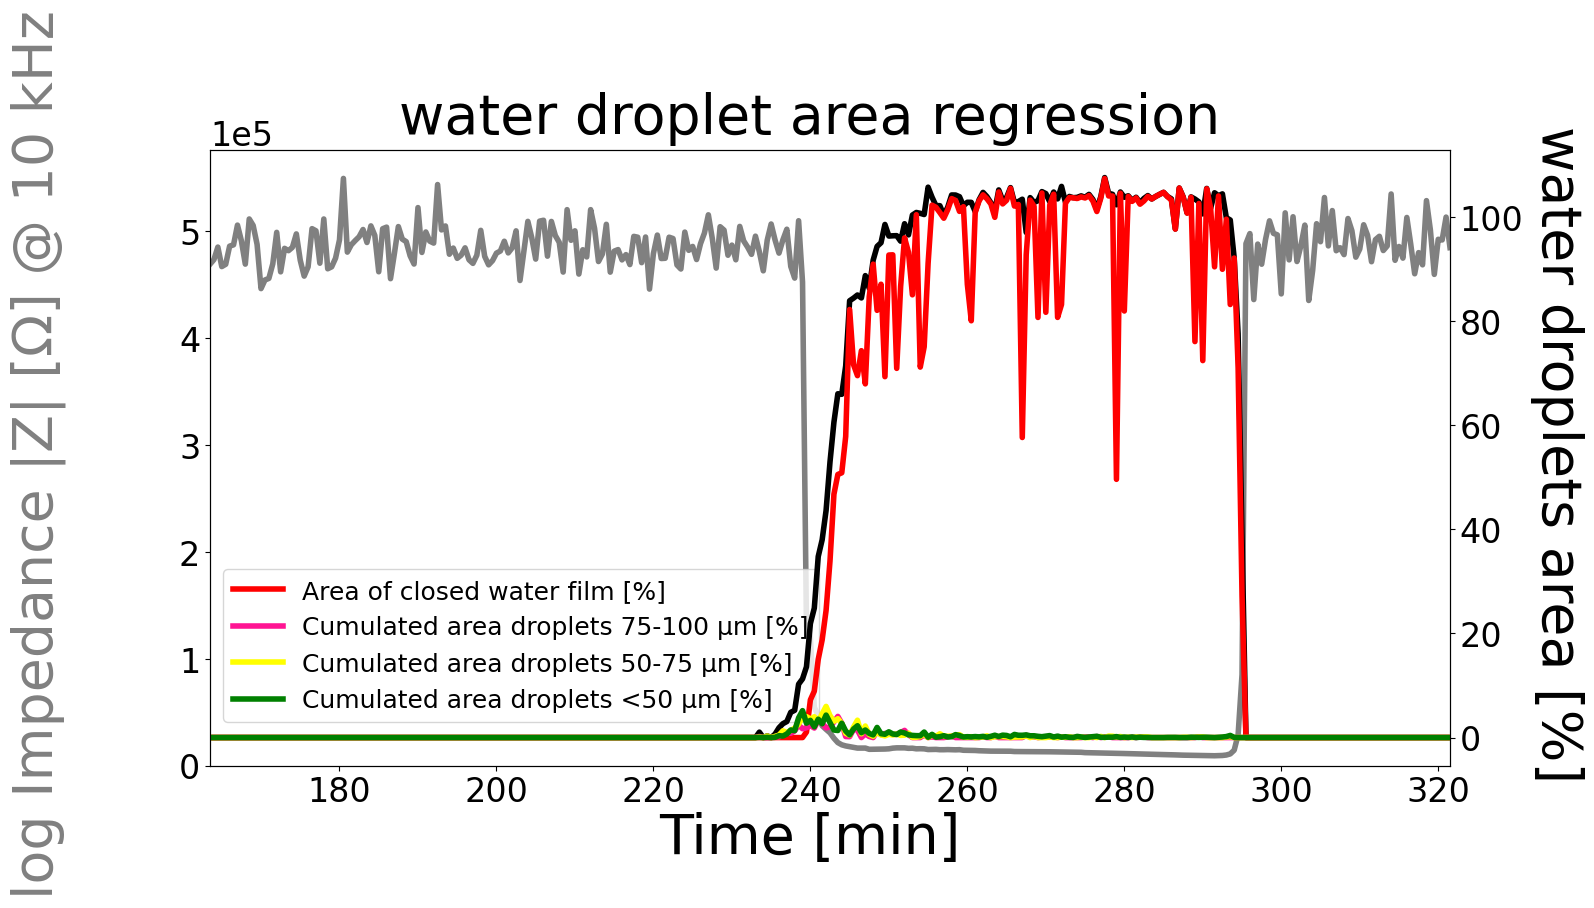

In [61]:
%matplotlib inline
import pandas as pd
df = pd.read_excel(r"C:\Users\HAU4SI\Desktop\project\library\tmp\p34src_c02_gt.xlsx")
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
matplotlib.rcParams.update({'font.size': 24})  # Replace 12 with your desired font size

lw = 4
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
# df.plot(x="Time [m]", y="Impedance |Z| [Ohm]", color="gray",fontsize=24, linewidth=lw)#, ylabel="log Impedance |Z| [Ω] @ 10^4 Hz", xlabel="Time [min]")

df.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, ax=ax, color="gray",fontsize=24, linewidth=lw)#, ylabel="log Impedance |Z| [Ω] @ 10^4 Hz", xlabel="Time [min]")
df.plot(x="Time [m]", 
        y=[
                "Covered water area [%]", "Area of closed water film [%]",
                "Cumulated area droplets 75-100 µm [%]", 
                "Cumulated area droplets 50-75 µm [%]",
                "Cumulated area droplets <50 µm [%]"],
        secondary_y= 5*[True],
        color=["black", "red", "deeppink", "yellow", "green"], ax=ax_cp, linewidth=lw, fontsize=24)#, ylabel="water droplet area [%]")
# ax.get_legend().set_visible(False)
# ax_cp.get_legend().set_visible(False)
# ax.legend(["Impedance"], bbox_to_anchor=(0.115, 0.25), loc="center right")
ax_cp.legend([  "Impedance |Z| [Ohm]",
                "Total", "Closed water film",
                "75-100 µm", 
                "50-75 µm", "<50 µm"], 
             bbox_to_anchor=(0, 0.15), 
             loc="center left", 
             labelcolor=["black", "red", "deeppink", "yellow", "green"])
ax_cp.get_legend().set_visible(False) 
ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)
handles2, labels2 = ax_cp.get_legend_handles_labels()

ax.legend(handles2[1:], labels2[1:], loc='lower left', fontsize=18, bbox_to_anchor=(0,0.05))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

fig.text(0.5, 0.9, "water droplet area regression", ha='center', fontsize=40)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets area [%]', va='center', rotation=-90,  fontsize=40)
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')


### new method for p34src 2 cycle ground truth

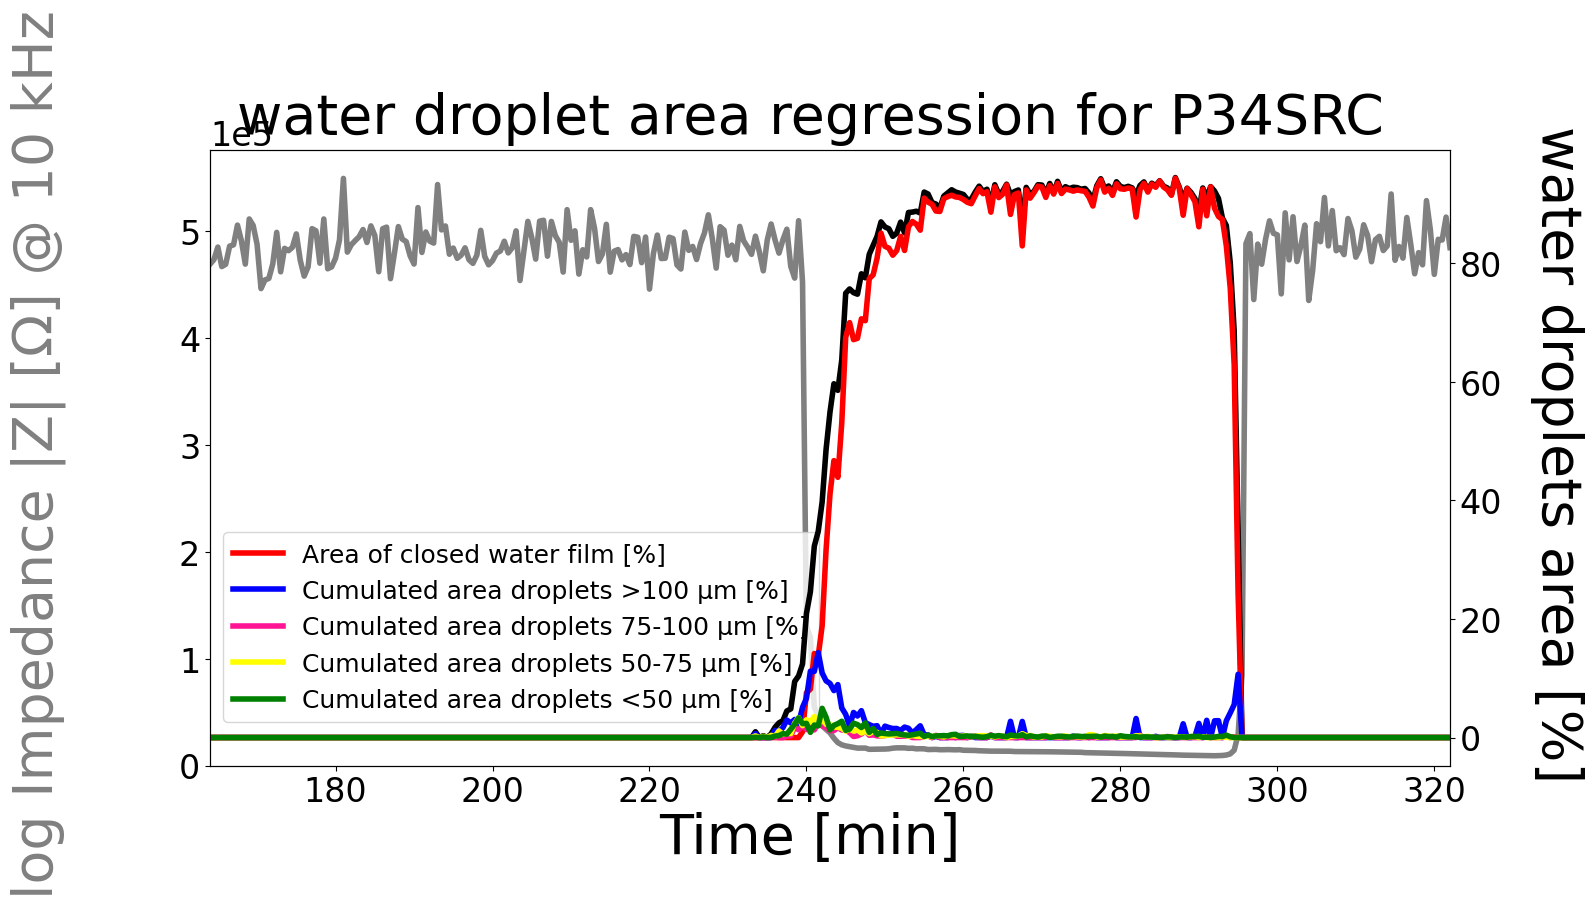

In [62]:
%matplotlib inline
df = pd.read_excel(r"C:\Users\HAU4SI\Desktop\project\demo_data\p34src\table\waterdroplet_stats164-322.xlsx")
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 24})  # Replace 12 with your desired font size

lw = 4
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, fontsize=24, linewidth=lw)#, ylabel="log Impedance |Z| [Ω] @ 10^4 Hz", xlabel="Time [min]")
df.plot(x="Time [m]", 
        y=[
                "Covered water area [%]", "Area of closed water film [%]",
                "Cumulated area droplets >100 µm [%]", 
                "Cumulated area droplets 75-100 µm [%]",
                "Cumulated area droplets 50-75 µm [%]",
                "Cumulated area droplets <50 µm [%]"],
        secondary_y= 5*[True],
        color=["black", "red", "blue", "deeppink", "yellow", "green"], ax=ax_cp, linewidth=lw, fontsize=24,)#, ylabel="water droplet area [%]")
ax.legend(["Impedance"], bbox_to_anchor=(1, 0.97), loc="right")
ax_cp.legend([
                "Total", "Closed water film",
                " >100 µm", "75-100 µm", 
                "50-75 µm", "<50 µm"
                ], bbox_to_anchor=(0, 0.15), loc="center left")
ax_cp.get_legend().set_visible(False) 
ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
handles2, labels2 = ax_cp.get_legend_handles_labels()

ax.legend(handles2[1:], labels2[1:], loc='lower left', fontsize=18, bbox_to_anchor=(0,0.05))
# ax_cp.axhline(y=100, visible=True, linewidth=5, color='r', linestyle='dashed', alpha=0.4)
fig.text(0.5, 0.9, "water droplet area regression for P34SRC", ha='center', fontsize=40)

fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets area [%]', va='center', rotation=-90,  fontsize=40)
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')

# EVALUATION

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
df1 = pd.read_excel(r"C:\Users\HAU4SI\Desktop\project\demo_data\p32nsruc_instance\table\groundtruth_waterdroplet_3000-3100.xlsx")

groundtruth_area = df1[["Cumulated area droplets <50 µm [%]", "Cumulated area droplets 50-75 µm [%]", "Cumulated area droplets 75-100 µm [%]",
                       "Cumulated area droplets >100 µm [%]", "Area of closed water film [%]", "Covered water area [%]"]]

groundtruth_num = df1[["Number of droplets <50 µm [#]", "Number of droplets 50-75 µm [#]", "Number of droplets 75-100 µm [#]", 
          "Number of droplets >100 µm [#]", "Number of closed water film [#]", "Total Number of droplets Ntotal [#]"]]
df3 = pd.read_excel(r"C:\Users\HAU4SI\Desktop\project\demo_data\p32nsruc_instance\table\waterdroplet_stats3000-3100.xlsx")

new_num = df3[["Number of droplets <50 µm [#]", "Number of droplets 50-75 µm [#]", "Number of droplets 75-100 µm [#]", 
          "Number of droplets >100 µm [#]", "Number of closed water film [#]", "Total Number of droplets Ntotal [#]"]]

new_area = df3[["Cumulated area droplets <50 µm [%]", "Cumulated area droplets 50-75 µm [%]", "Cumulated area droplets 75-100 µm [%]",
                       "Cumulated area droplets >100 µm [%]", "Area of closed water film [%]", "Covered water area [%]"]]
df2 = pd.read_excel(r"C:\Users\HAU4SI\Desktop\project\demo_data\p32nsruc_instance\table\nan_waterdroplet_3000-3100.xlsx")

nan_area = df2[["Cumulated area droplets <50 µm [%]", "Cumulated area droplets 50-75 µm [%]", "Cumulated area droplets 75-100 µm [%]",
                       "Cumulated area droplets >100 µm [%]", "Area of closed water film [%]", "Covered water area [%]"]]

nan_num = df2[["Number of droplets <50 µm [#]", "Number of droplets 50-75 µm [#]", "Number of droplets 75-100 µm [#]", 
          "Number of droplets >100 µm [#]", "Number of closed water film [#]", "Total Number of droplets Ntotal [#]"]]

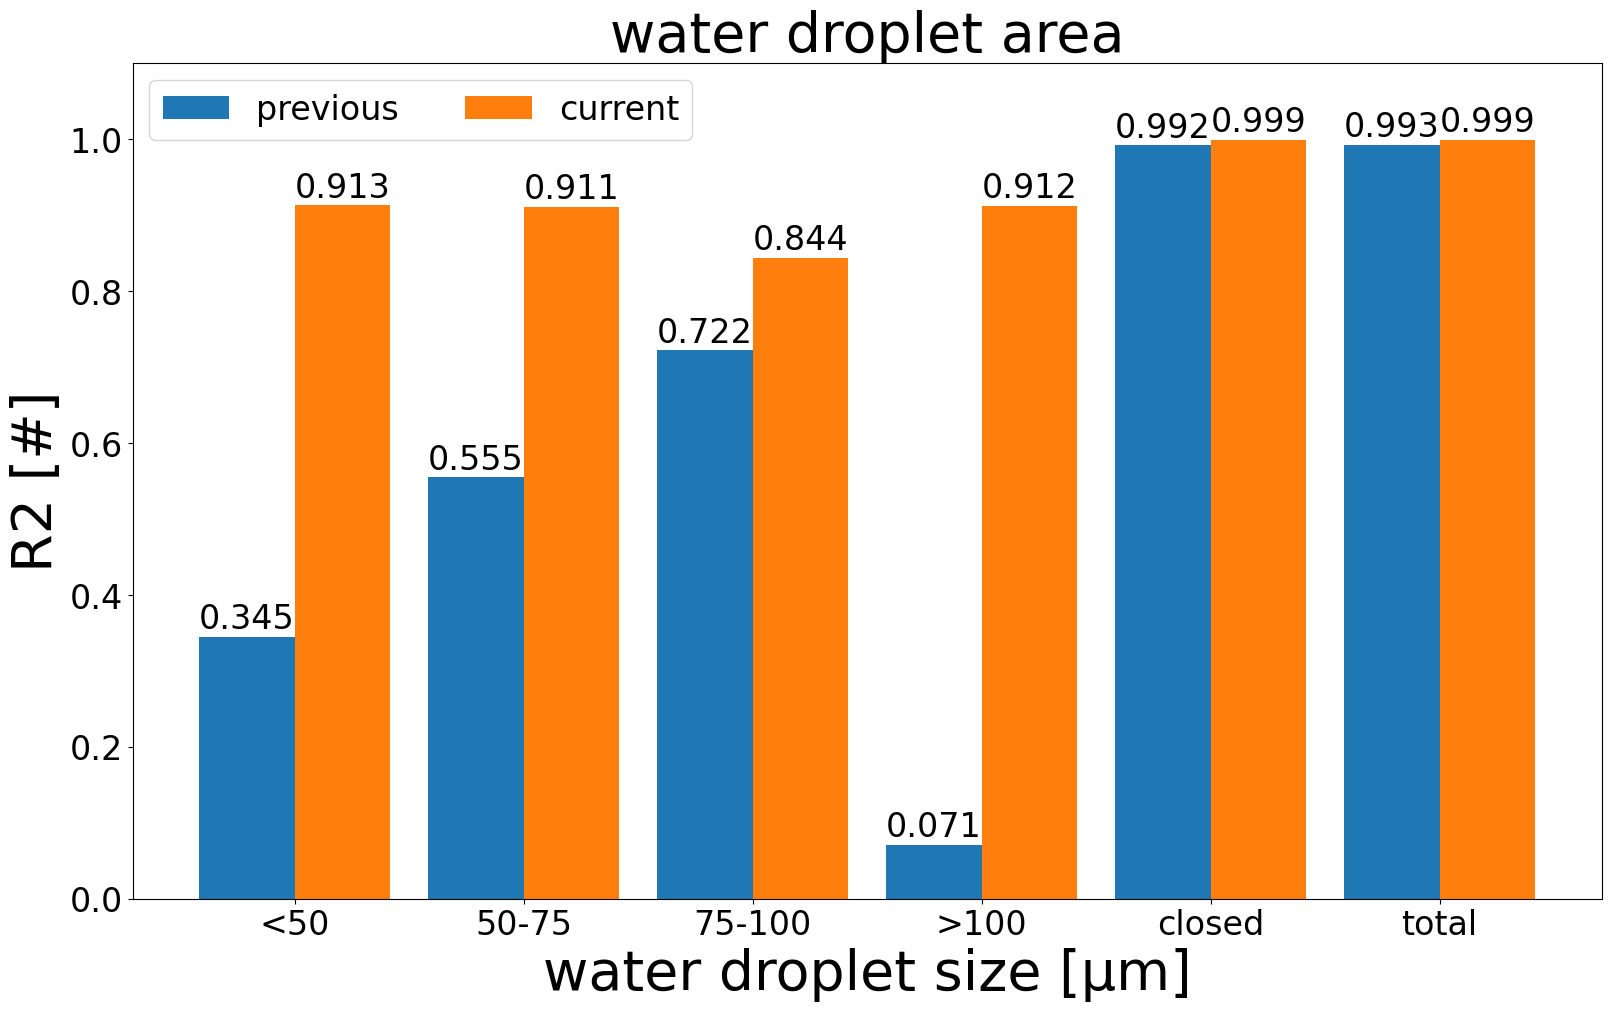

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
matplotlib.rcParams.update({'font.size': 24})  # Replace 12 with your desired font size
species = ("<50", "50-75", "75-100", ">100", "closed", "total")
penguin_means = {
    'previous': r2_score(groundtruth_area, nan_area, multioutput="raw_values").round(3),
    'current': r2_score(groundtruth_area, new_area, multioutput="raw_values").round(3),
}

x = np.arange(len(species))*1.2  # the label locations
width = 0.5  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(figsize=(16, 10), layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, list(map(lambda x: x if x> 0 else 0, measurement)), width, label=attribute, data=measurement)
    ax.bar_label(rects, padding=1, labels=measurement, fontsize=24)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2 [#]',fontsize=40)
ax.set_xlabel("water droplet size [µm]", fontsize=40)
ax.set_title('water droplet area',fontsize=40)
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3, fontsize=24)
ax.set_ylim(0, 1.1)
plt.show()

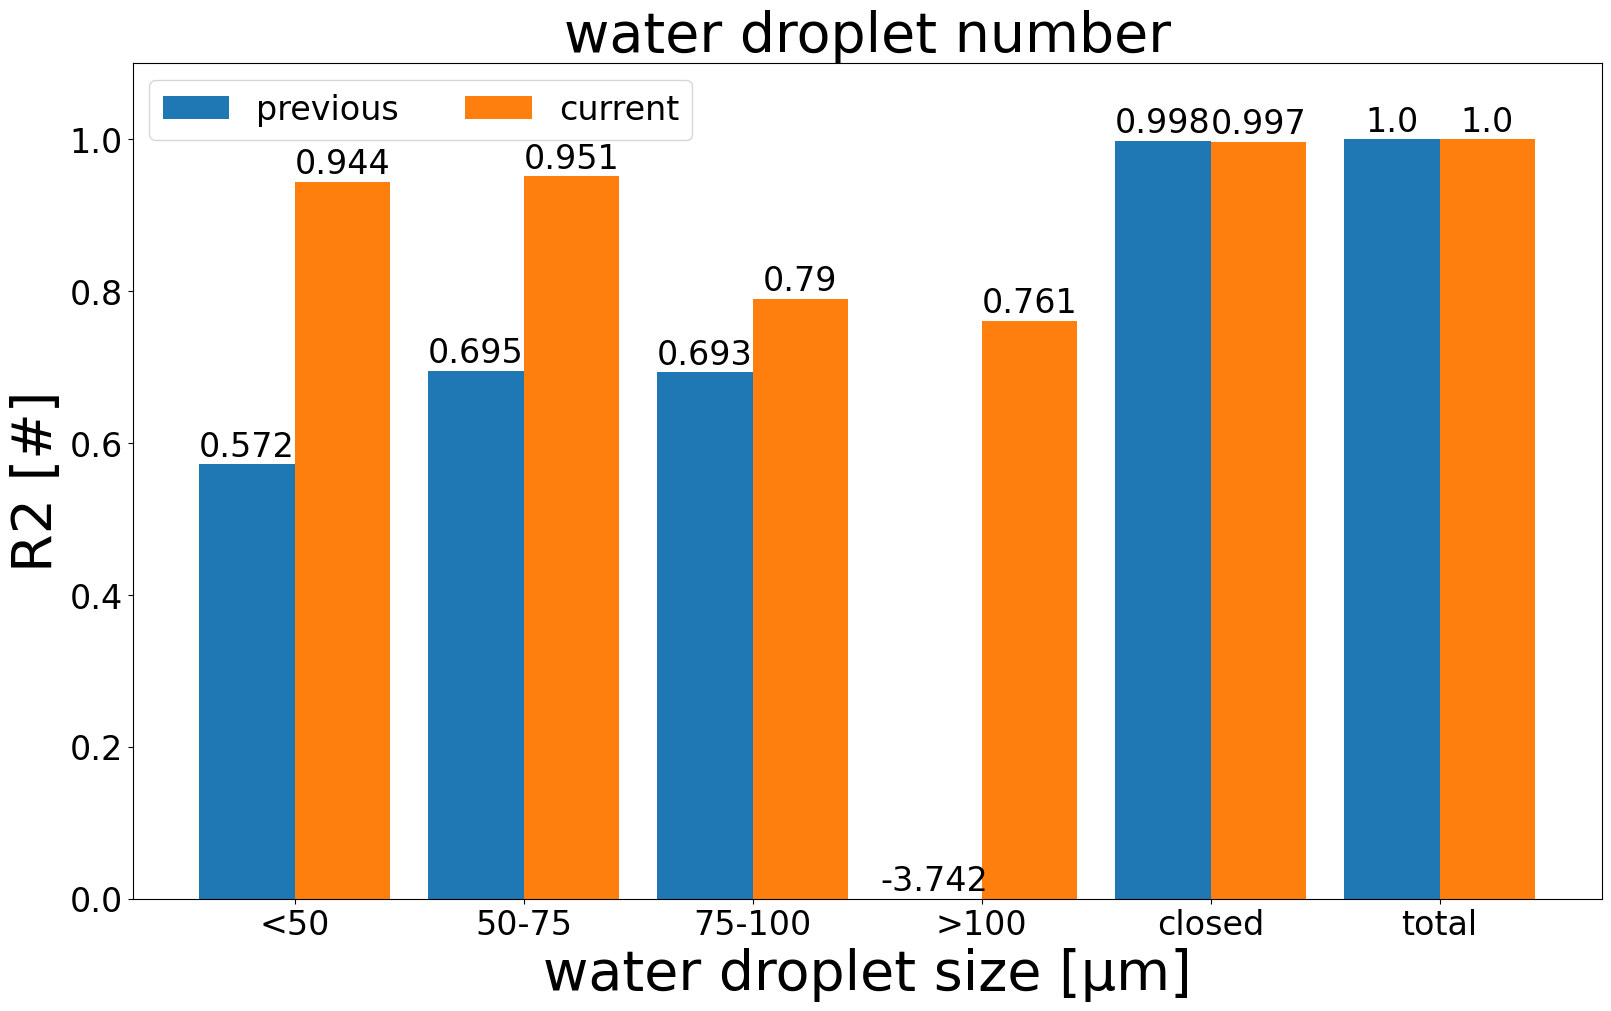

In [24]:
import matplotlib.pyplot as plt
import numpy as np

species = ("<50", "50-75", "75-100", ">100", "closed", "total")
penguin_means = {
    'previous': r2_score(groundtruth_num, nan_num, multioutput="raw_values").round(3),
    'current': r2_score(groundtruth_num, new_num, multioutput="raw_values").round(3),
}

x = np.arange(len(species))*1.2  # the label locations
width = 0.5  # the width of the bars
multiplier = 0.5

fig, ax = plt.subplots(figsize=(16, 10), layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, list(map(lambda x: x if x> 0 else 0, measurement)), width, label=attribute)
    ax.bar_label(rects, padding=1, labels=measurement)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2 [#]', fontsize=40)
ax.set_xlabel("water droplet size [µm]", fontsize=40)
ax.set_title('water droplet number',fontsize=40)
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1.1)
plt.show()

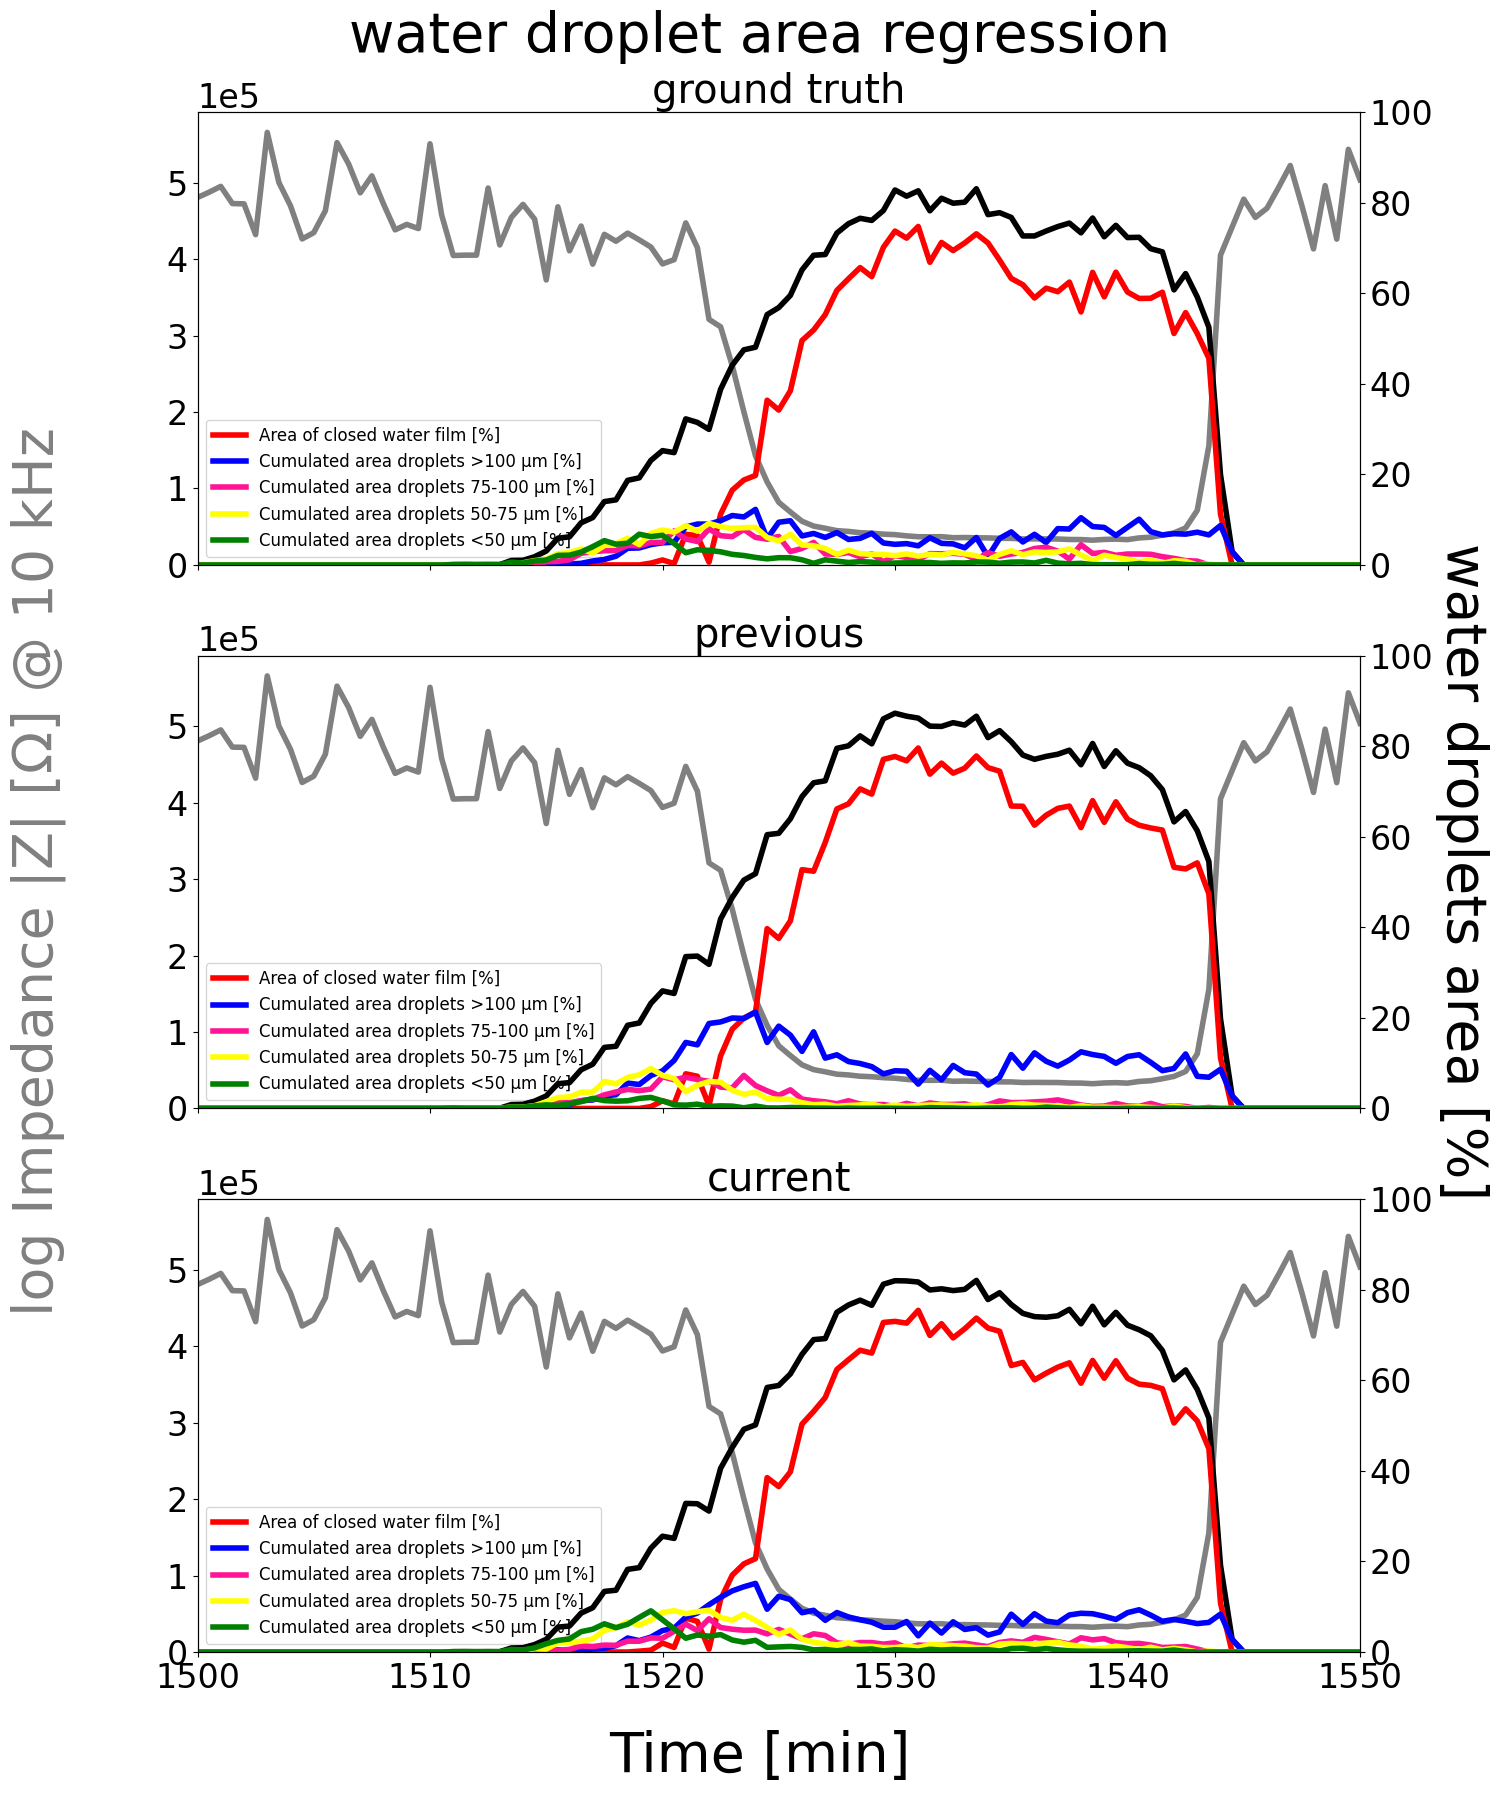

In [63]:
%matplotlib inline

import matplotlib.pyplot as plt
dfs = (df1, df2, df3)
lw = 4
titles=["ground truth", "previous", "current"]
fig, axes = plt.subplots(3, sharex="all", figsize=(15, 20))
for i, (ax, df, title) in enumerate(zip(axes, dfs, titles)):
        ax_cp = ax.twinx()
        df.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, title=title, fontsize=24, linewidth=lw)#, ylabel="log Impedance |Z| [Ω] @ 10^4 Hz", xlabel="Time [min]")
        df.plot(x="Time [m]", 
                y=[
                        "Covered water area [%]", "Area of closed water film [%]",
                        "Cumulated area droplets >100 µm [%]", "Cumulated area droplets 75-100 µm [%]", 
                        "Cumulated area droplets 50-75 µm [%]","Cumulated area droplets <50 µm [%]"],
                secondary_y= 6*[True],
                color=["black", "red", "blue", "deeppink", "yellow", "green"], ax=ax_cp, ylim=(0, 100), linewidth=lw)#, ylabel="water droplet area [%]")
        # ax.get_legend().set_visible(False)
        # ax_cp.get_legend().set_visible(False)
        ax.legend(["Impedance"], bbox_to_anchor=(1, 0.95), loc="right")
        ax_cp.legend([
                        "Total", "Closed water film",
                        " >100 µm", "75-100 µm", 
                        "50-75 µm", "<50 µm"], bbox_to_anchor=(0, 0.2), loc="center left")
        ax_cp.get_legend().set_visible(False) 
        ax.set_xlabel(None)
        ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
        ax.set_ylim(0)
        handles2, labels2 = ax_cp.get_legend_handles_labels()

        ax.legend(handles2[1:], labels2[1:], loc='lower left', fontsize=12)
        ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
        # ax_cp.axhline(y=100, visible=True, linewidth=5, color='r', linestyle='dashed', alpha=0.4)
fig.text(0.5, 0.91, "water droplet area regression", ha='center', fontsize=40)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0.05, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets area [%]', va='center', rotation=-90,  fontsize=40)
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')



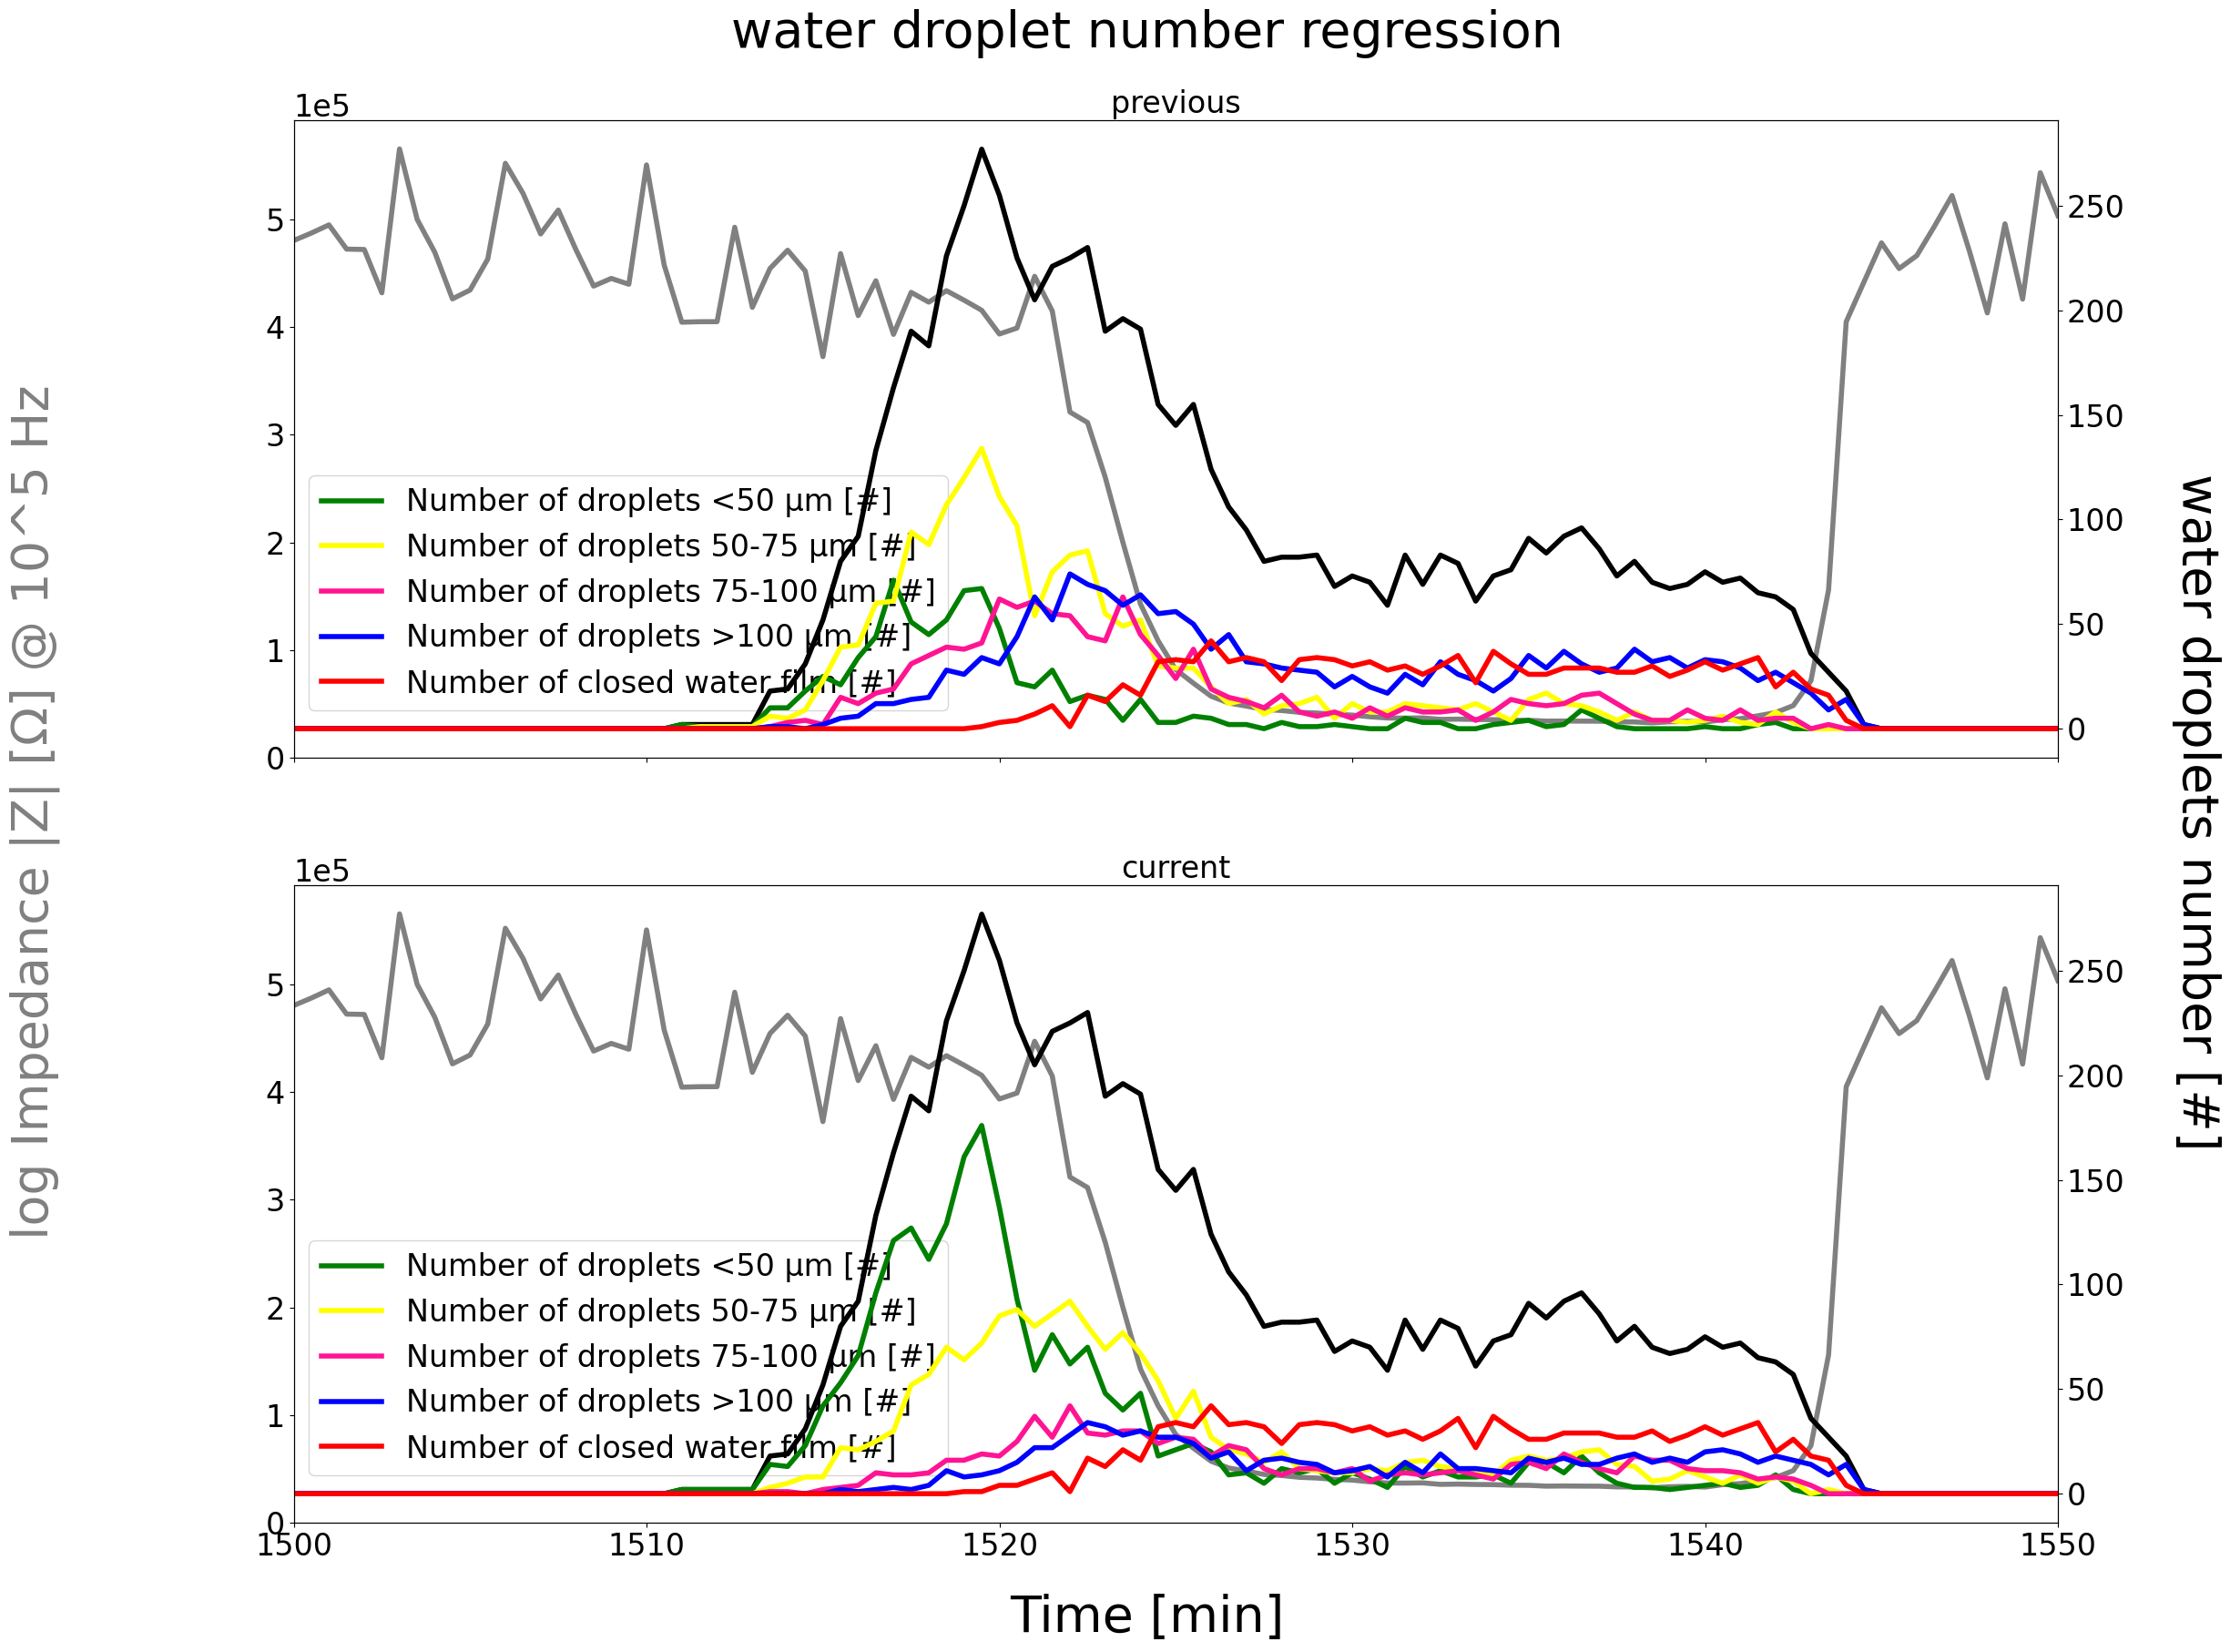

In [64]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 24})  # Replace 12 with your desired font size
dfs = (df2, df3)
lw = 4
titles=["previous", "current"]
fig, axes = plt.subplots(len(dfs), sharex="all", figsize=(25, 20))
for i, (ax, df, title) in enumerate(zip(axes, dfs, titles)):
        ax_cp = ax.twinx()
        df.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw)#, ylabel="log Impedance |Z| [Ω] @ 10^4 Hz", xlabel="Time [min]")
        df.plot(x="Time [m]", 
                y=[
                        "Total Number of droplets Ntotal [#]", 
                        "Number of droplets <50 µm [#]",
                        "Number of droplets 50-75 µm [#]", 
                        "Number of droplets 75-100 µm [#]", 
                        "Number of droplets >100 µm [#]",
                        "Number of closed water film [#]"],
                secondary_y= 6*[True],
                color=["black", "green", "yellow", "deeppink", "blue","red"], ax=ax_cp, linewidth=lw)#, ylabel="water droplet area [%]")
        # ax.get_legend().set_visible(False)
        # ax_cp.get_legend().set_visible(False)
        ax.set_title(title, fontsize=24)
        ax.legend(["Impedance"], bbox_to_anchor=(1, 0.95), loc="right")
        ax_cp.legend([
                        "Total", "Closed water film",
                        " >100 µm", "75-100 µm", 
                        "50-75 µm", "<50 µm"], bbox_to_anchor=(0, 0.2), loc="center left")
        ax_cp.get_legend().set_visible(False) 
        ax.set_xlabel(None)
        ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
        ax.set_ylim(0)
        handles2, labels2 = ax_cp.get_legend_handles_labels()

        ax.legend(handles2[1:], labels2[1:], loc='lower left', fontsize=24, bbox_to_anchor=(0,0.05))
        ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

ax.set_xlabel(None)

fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10^5 Hz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0.05, 'Time [min]', ha='center', fontsize=40)

fig.text(0.5, 0.92, "water droplet number regression", ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets number [#]', va='center', rotation=-90,  fontsize=40)
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')




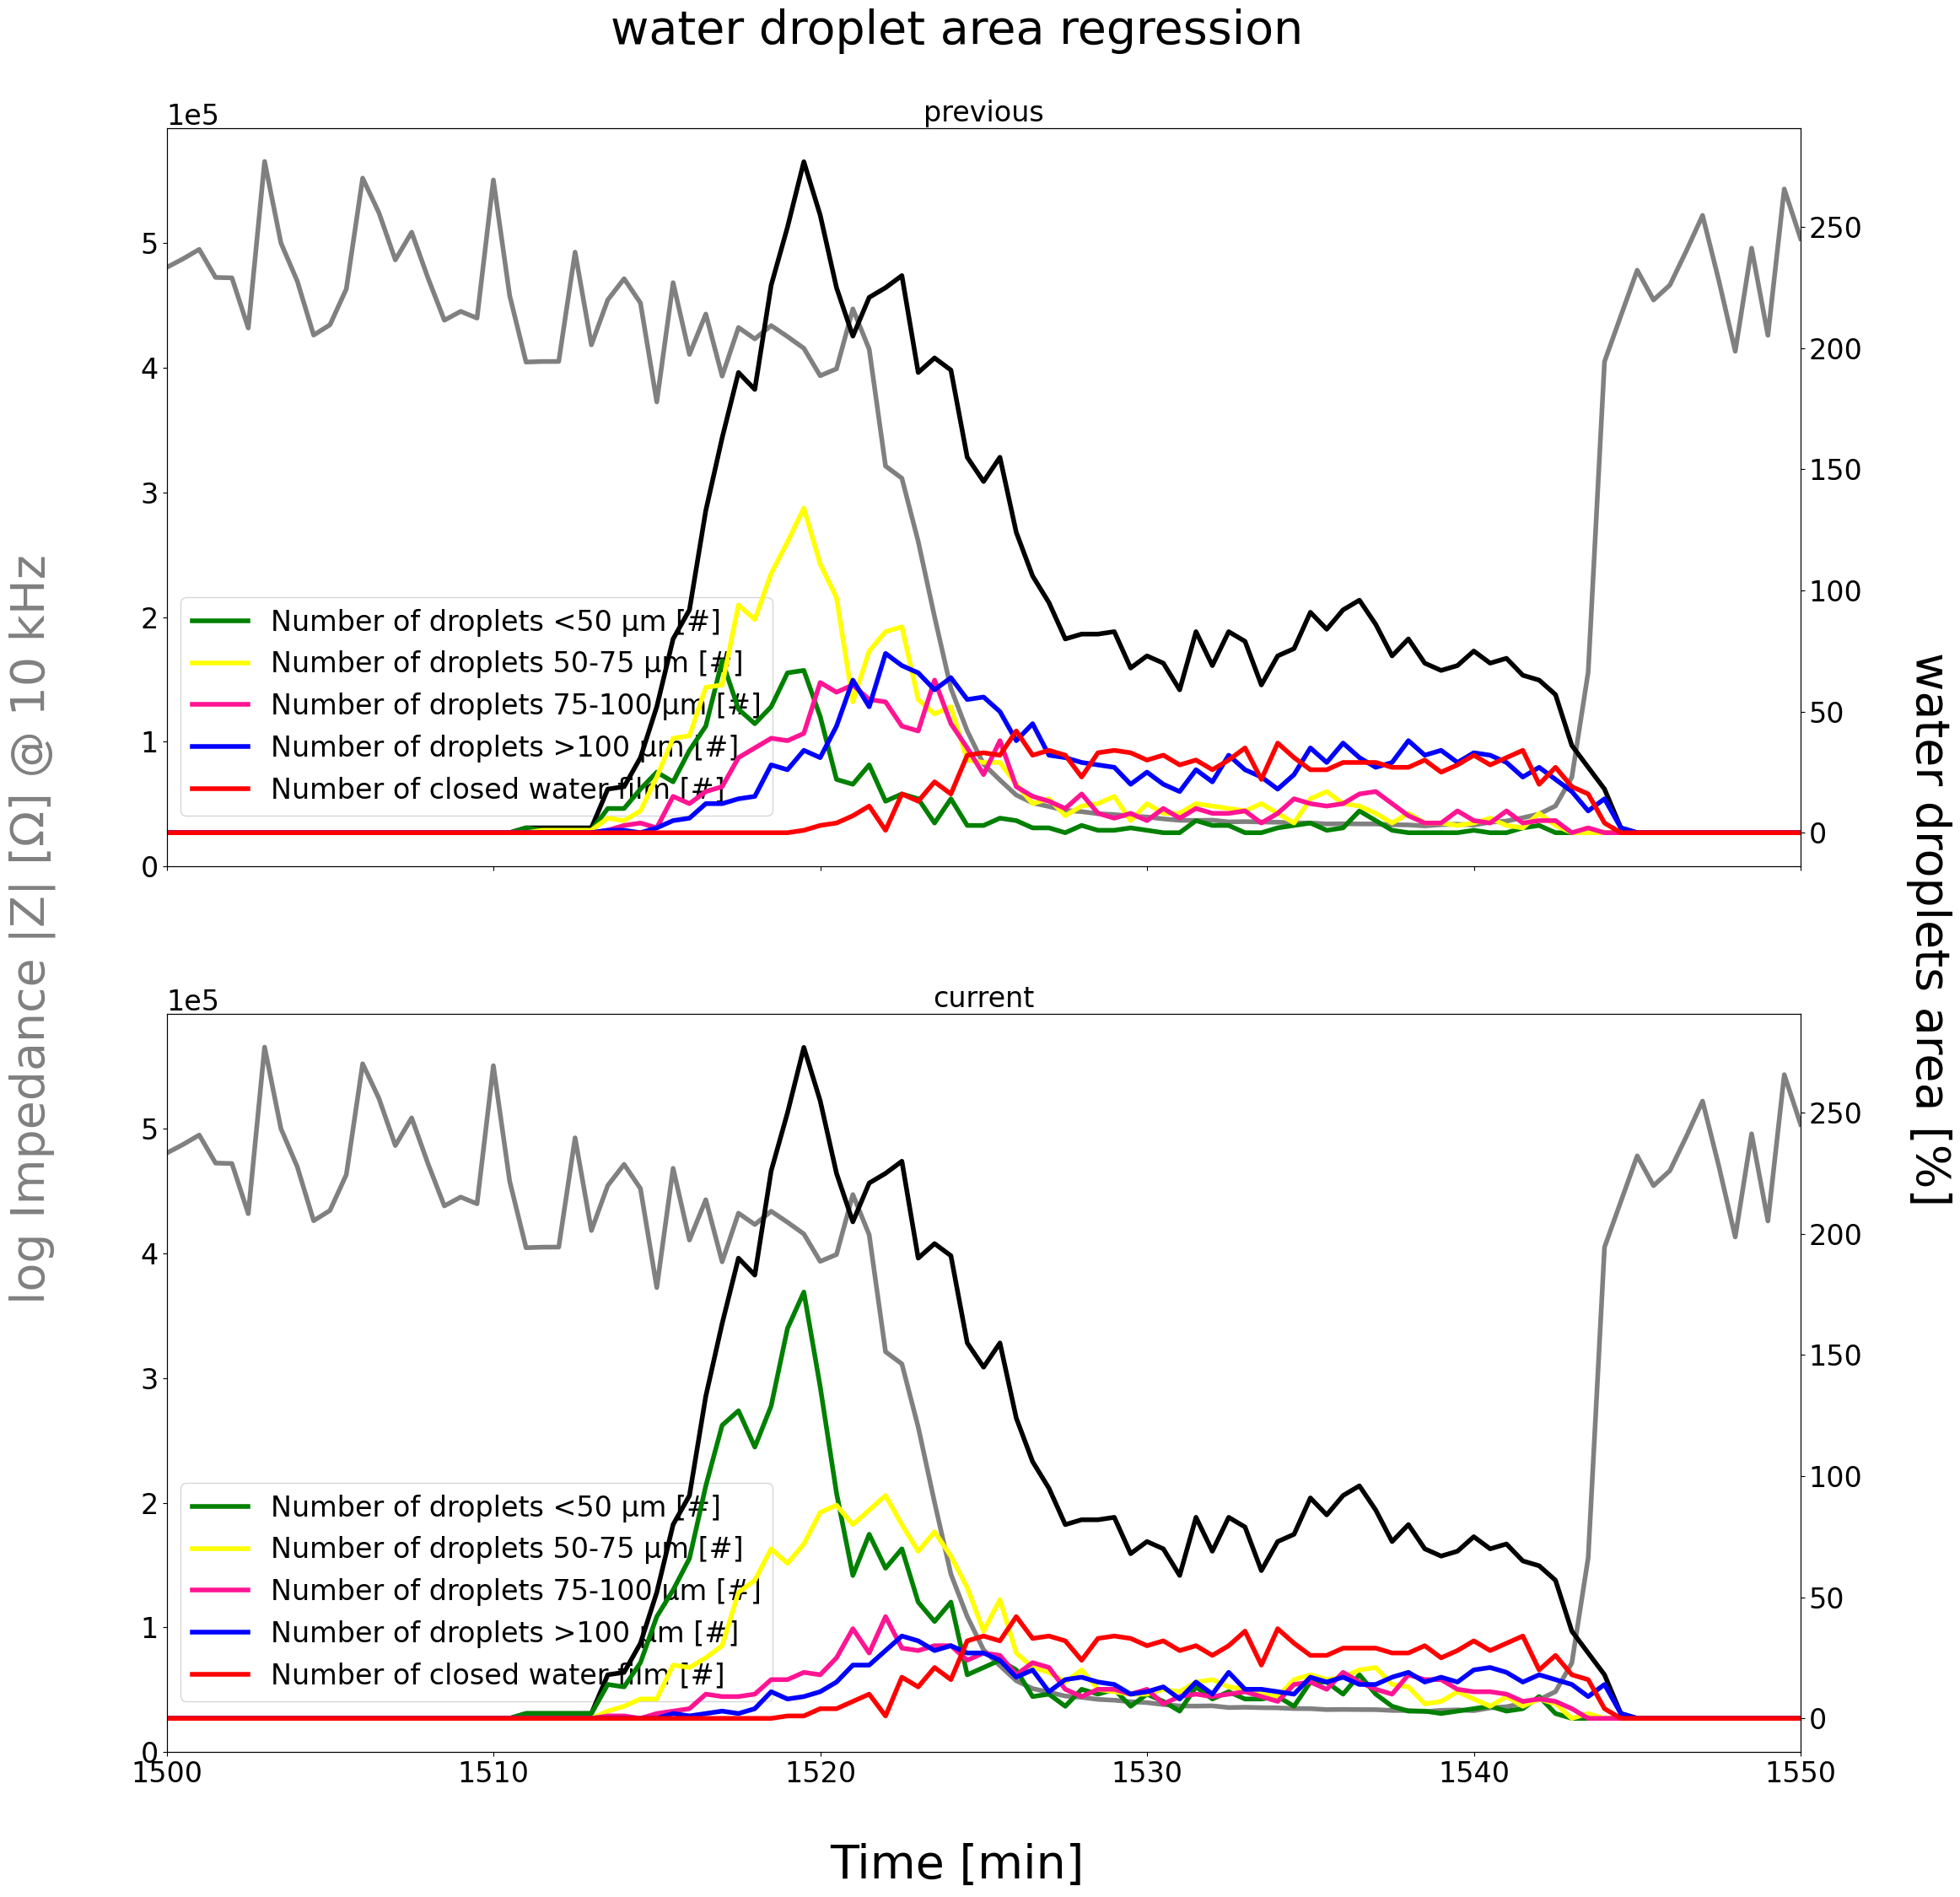

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
dfs = (df2, df3)
lw = 4
titles=["previous", "current"]
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, axes = plt.subplots(len(dfs), sharex="all", figsize=(25, 25))
for i, (ax, df, title) in enumerate(zip(axes, dfs, titles)):
        ax_cp = ax.twinx()
        df.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, fontsize=24, linewidth=lw)#, ylabel="log Impedance |Z| [Ω] @ 10^4 Hz", xlabel="Time [min]")
        df.plot(x="Time [m]", 
                y=[
                        "Total Number of droplets Ntotal [#]", 
                        "Number of droplets <50 µm [#]",
                        "Number of droplets 50-75 µm [#]", 
                        "Number of droplets 75-100 µm [#]", 
                        "Number of droplets >100 µm [#]",
                        "Number of closed water film [#]"],
                secondary_y= 6*[True],
                color=["black", "green", "yellow", "deeppink", "blue","red"], ax=ax_cp,linewidth=lw)#, ylabel="water droplet area [%]")
        # ax.get_legend().set_visible(False)
        # ax_cp.get_legend().set_visible(False)
        ax.set_title(title, fontsize=24)
        ax.legend(["Impedance"], bbox_to_anchor=(1, 0.95), loc="right")
        ax_cp.legend([ "Total", "<50 µm", "50-75 µm","75-100 µm", " >100 µm", "Closed water film"], bbox_to_anchor=(0, 0.2), loc="center left", fontsize=24)
        ax_cp.get_legend().set_visible(False) 
        ax.set_xlabel(None)
        ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
        ax.set_ylim(0)
        handles2, labels2 = ax_cp.get_legend_handles_labels()
        ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

        ax.legend(handles2[1:], labels2[1:], loc='lower left', fontsize=24, bbox_to_anchor=(0,0.05))
        # ax_cp.axhline(y=100, visible=True, linewidth=5, color='r', linestyle='dashed', alpha=0.4)
fig.text(0.5, 0.92, "water droplet area regression", ha='center', fontsize=40)
fig.text(0.05, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0.05, 'Time [min]', ha='center', fontsize=40)

fig.text(0.95, 0.5, 'water droplets area [%]', va='center', rotation=-90,  fontsize=40)


text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')



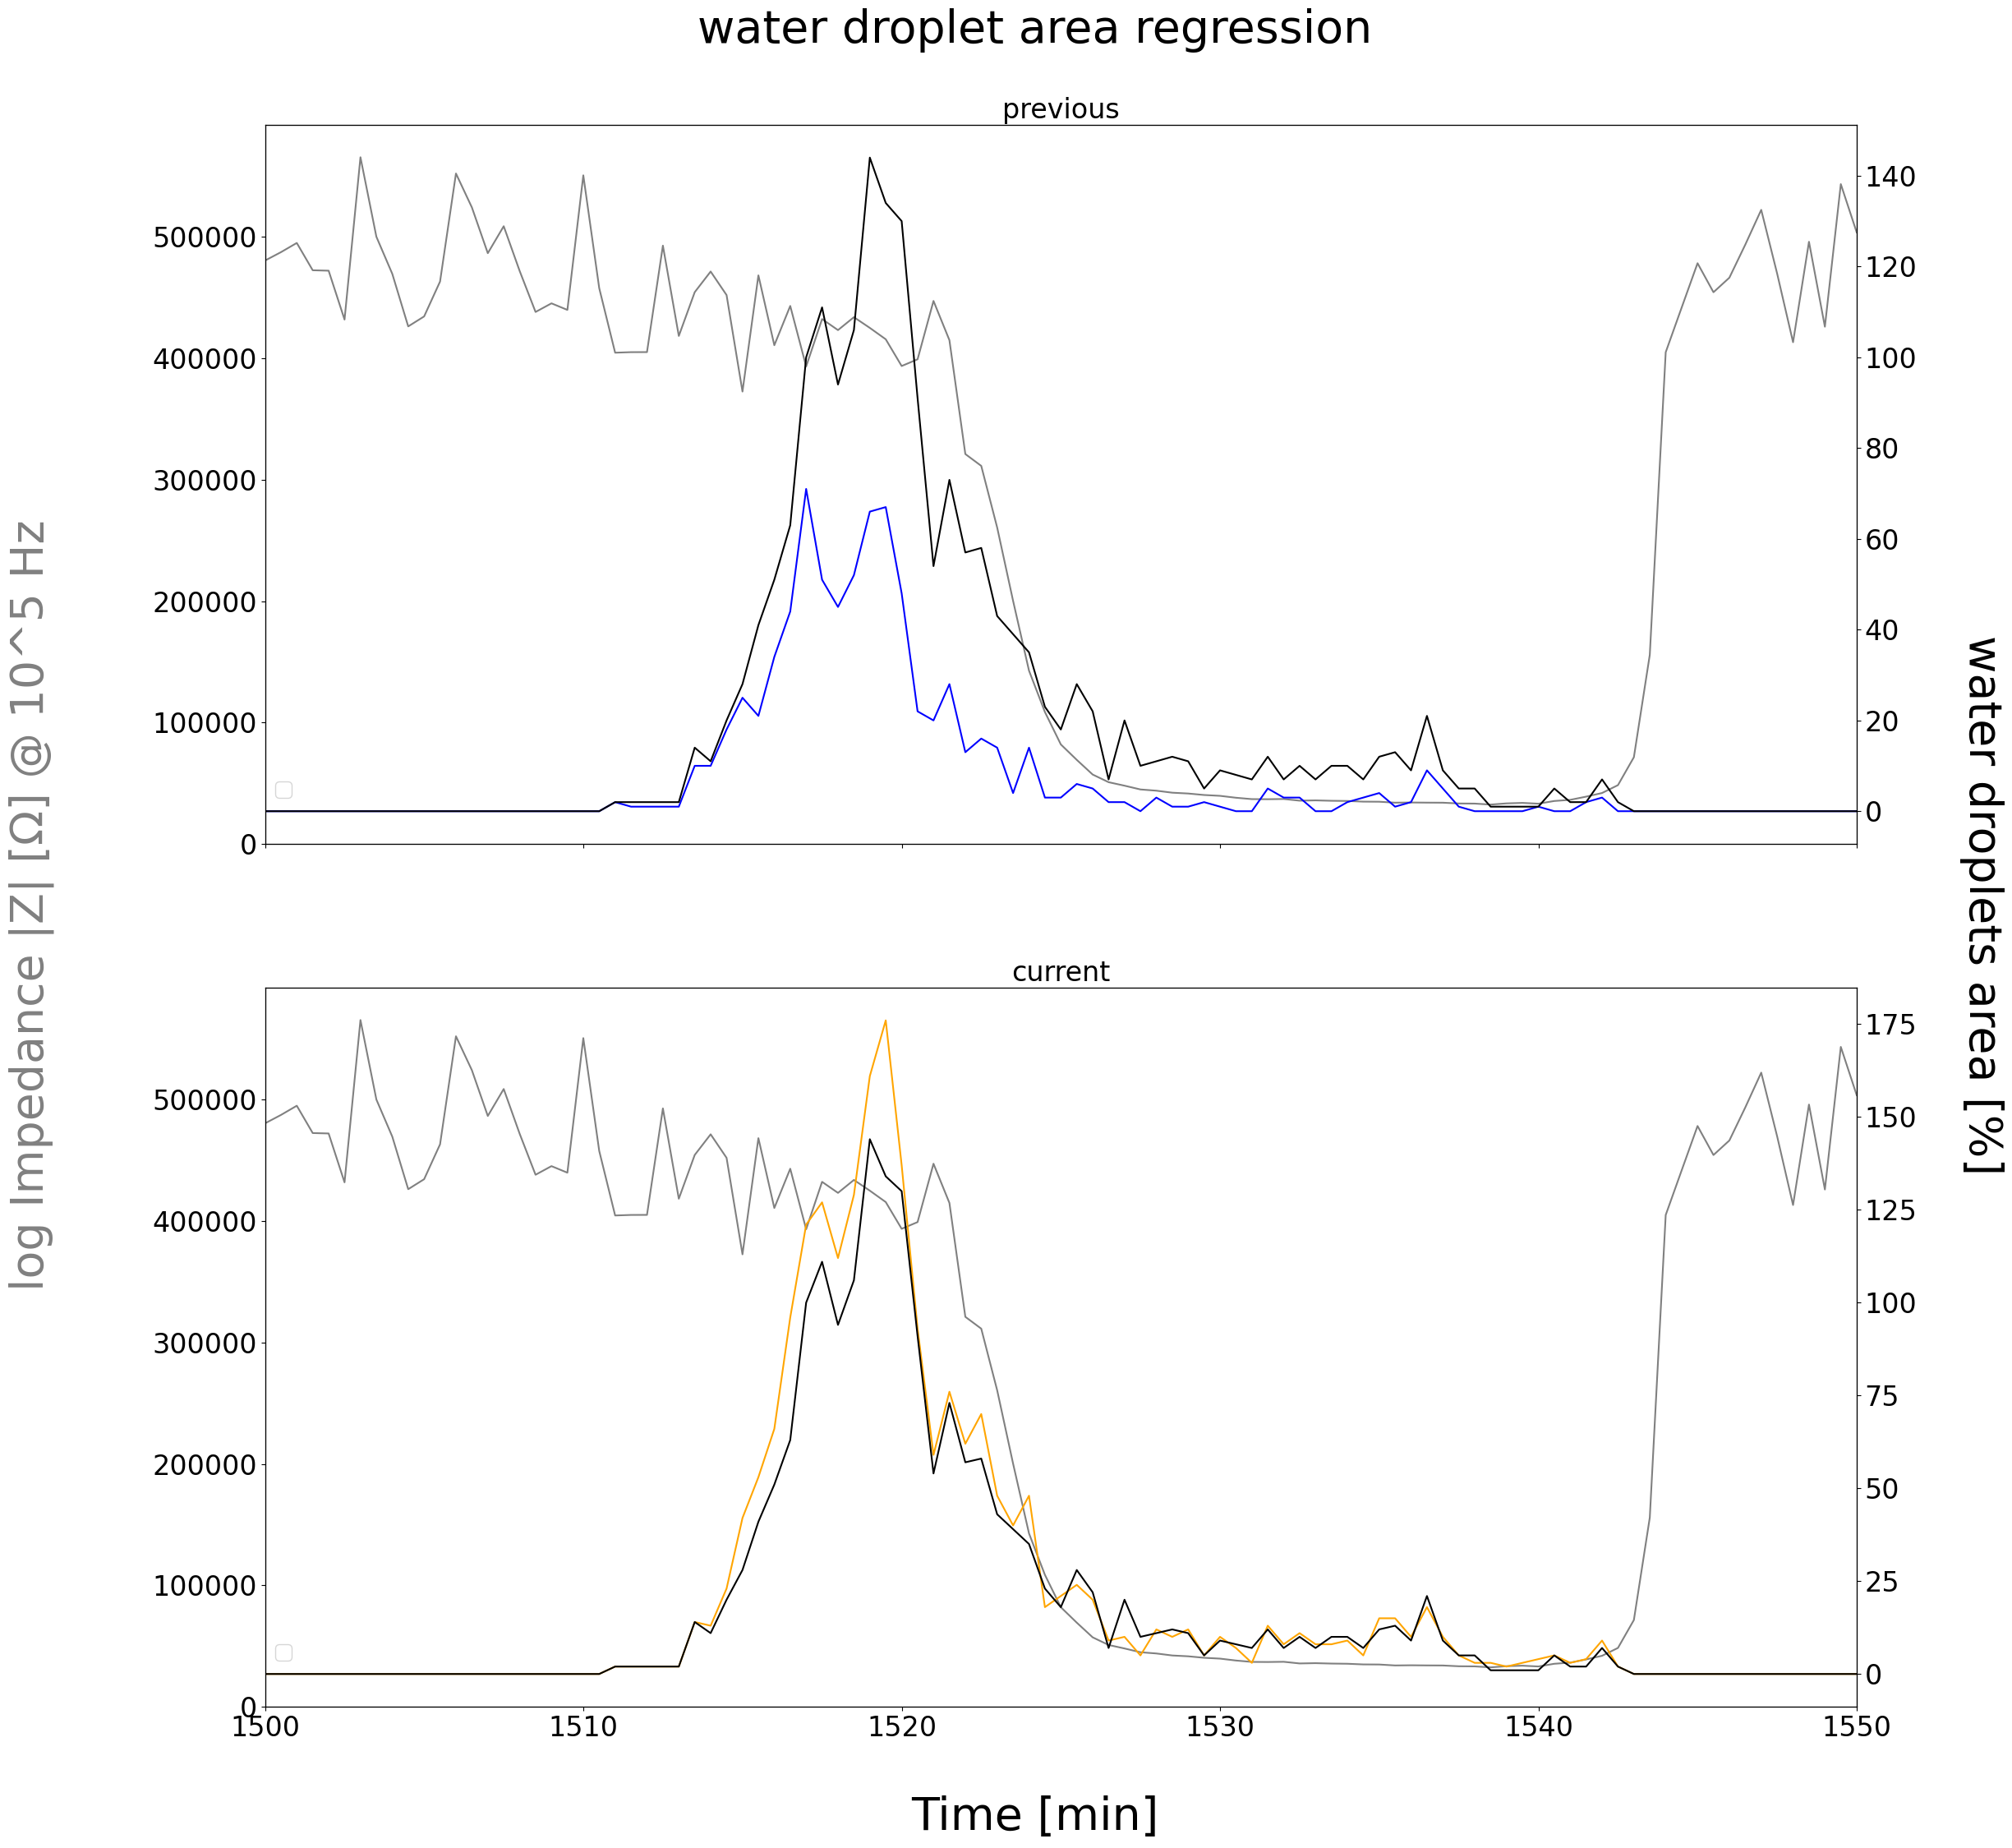

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
dfs = (df2, df3)
titles=["previous", "current"]
fig, axes = plt.subplots(len(dfs), sharex="all", figsize=(25, 25))
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
color_map = ["blue", "orange"]
for i, (ax, df, title, c) in enumerate(zip(axes, dfs, titles, color_map)):
        ax_cp = ax.twinx()
        df.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, title=title, fontsize=24)#, ylabel="log Impedance |Z| [Ω] @ 10^4 Hz", xlabel="Time [min]")
        df.plot(x="Time [m]",label="<50 µm [#], prediction",
                y= "Number of droplets <50 µm [#]",
                secondary_y= True,
                color=c, ax=ax_cp, fontsize=24)#, ylabel="water droplet area [%]")
        # ax.get_legend().set_visible(False)
        # ax_cp.get_legend().set_visible(False)
        df1.plot(x="Time [m]", y="Number of droplets <50 µm [#]",secondary_y= True, 
                 color="black",ax=ax_cp, label="<50 µm [#], ground truth", fontsize=24)

        ax.set_title(title, fontsize=24)
        ax.legend(["Impedance"], bbox_to_anchor=(1, 0.95), loc="right")
        ax_cp.legend([ "Total", "<50 µm", "50-75 µm","75-100 µm", " >100 µm", "Closed water film"], bbox_to_anchor=(0, 0.2), loc="center left", fontsize=24)
        ax_cp.get_legend().set_visible(False) 
        ax.set_xlabel(None)
        ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
        ax.set_ylim(0)
        handles2, labels2 = ax_cp.get_legend_handles_labels()


        ax.legend(handles2[1:], labels2[1:], loc='lower left', fontsize=18, bbox_to_anchor=(0,0.05))
        # ax_cp.axhline(y=100, visible=True, linewidth=5, color='r', linestyle='dashed', alpha=0.4)
fig.text(0.5, 0.92, "water droplet area regression", ha='center', fontsize=40)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10^5 Hz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0.05, 'Time [min]', ha='center', fontsize=40)

fig.text(0.95, 0.5, 'water droplets area [%]', va='center', rotation=-90,  fontsize=40)
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')



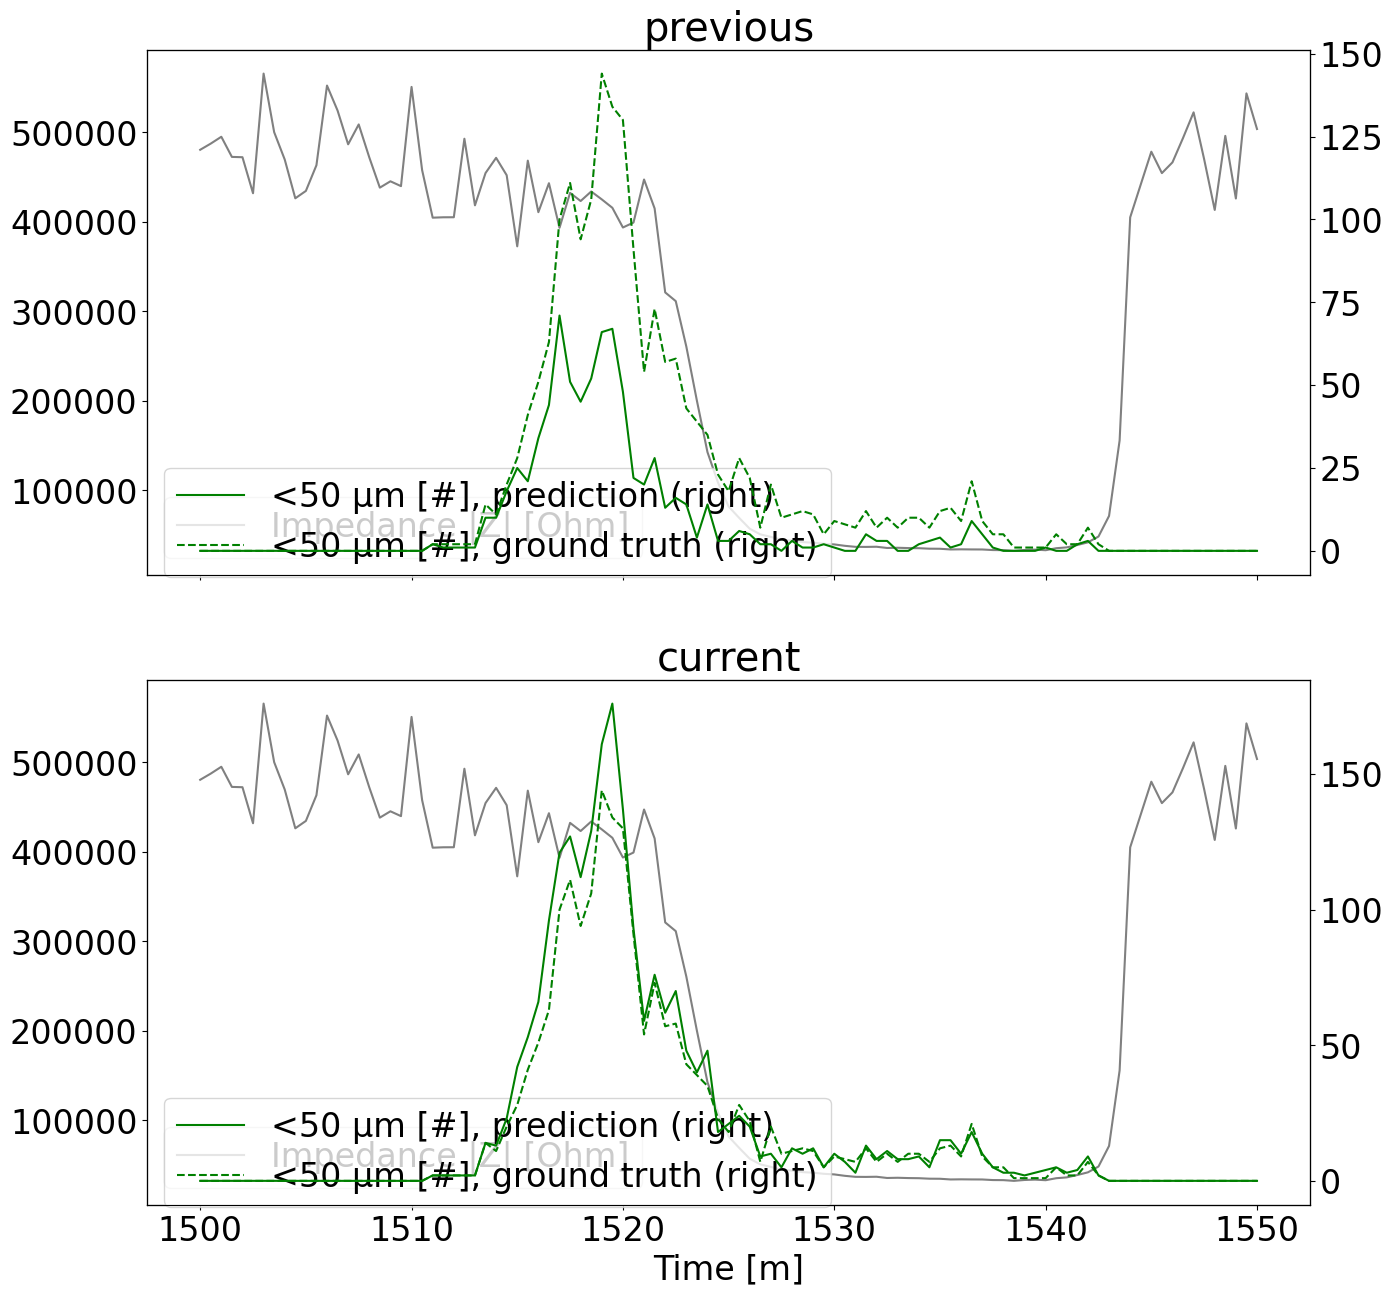

In [13]:
import matplotlib.pyplot as plt

dfs = (df2, df3)
titles = ["previous", "current"]

fig, axes = plt.subplots(len(dfs), sharex="all", figsize=(15, 15))

for i, (ax, df, title) in enumerate(zip(axes, dfs, titles)):
    ax_cp = ax.twinx()
    df.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, title=title)
    line_prediction = df.plot(x="Time [m]", label="<50 µm [#], prediction", y="Number of droplets <50 µm [#]", secondary_y=True, color="green", ax=ax_cp)
    line_ground_truth = df1.plot(x="Time [m]", y="Number of droplets <50 µm [#]", secondary_y=True, color="green", linestyle="dashed", ax=ax_cp, label="<50 µm [#], ground truth")

    h, l = line_prediction.axes.get_legend_handles_labels()
    # line_prediction.axes.legend(handles, labels, bbox_to_anchor=(0, 0.2), loc="center left", frameon=True)
    ax_cp.legend(h, l, bbox_to_anchor=(0, 0.1), loc="center left", frameon=True)

plt.show()


Text(0.5, 0.93, 'Number of droplets <50 µm')

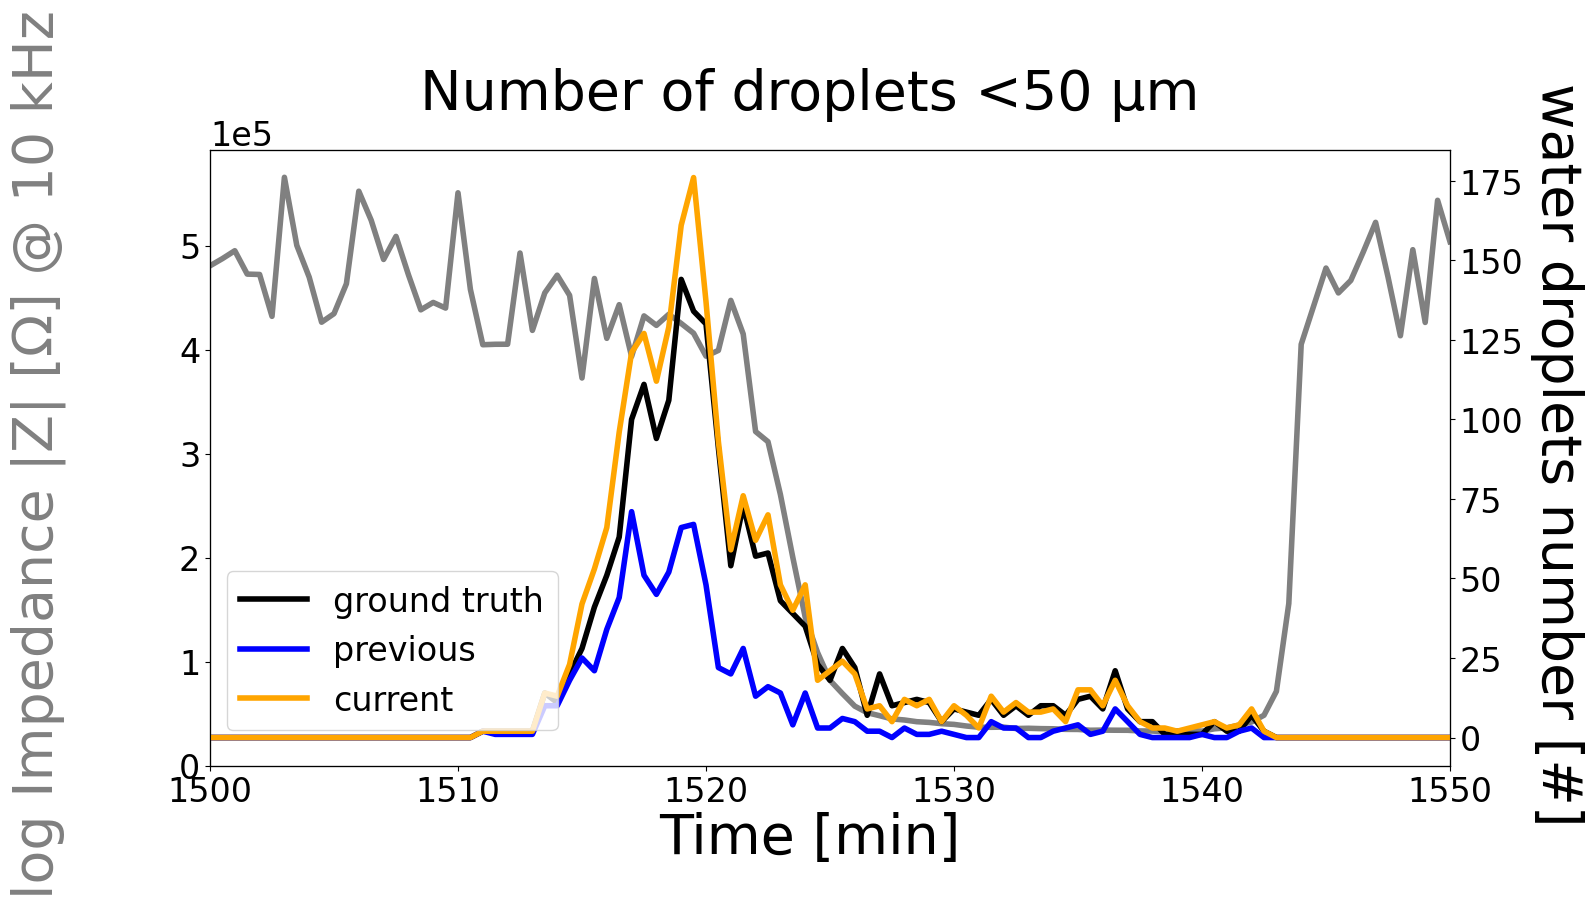

In [70]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
lw = 4
title = "water droplets < 50 µm"
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y="Number of droplets <50 µm [#]", secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y="Number of droplets <50 µm [#]", secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y="Number of droplets <50 µm [#]", secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
line_second.axes.legend(h, l, loc="lower left", frameon=True,  bbox_to_anchor=(0,0.03))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
ax.set_xlabel(None)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets number [#]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, "Number of droplets <50 µm", ha='center', fontsize=40)

# plt.show()


Text(0.5, 0.93, 'Number of droplets 50-75 µm')

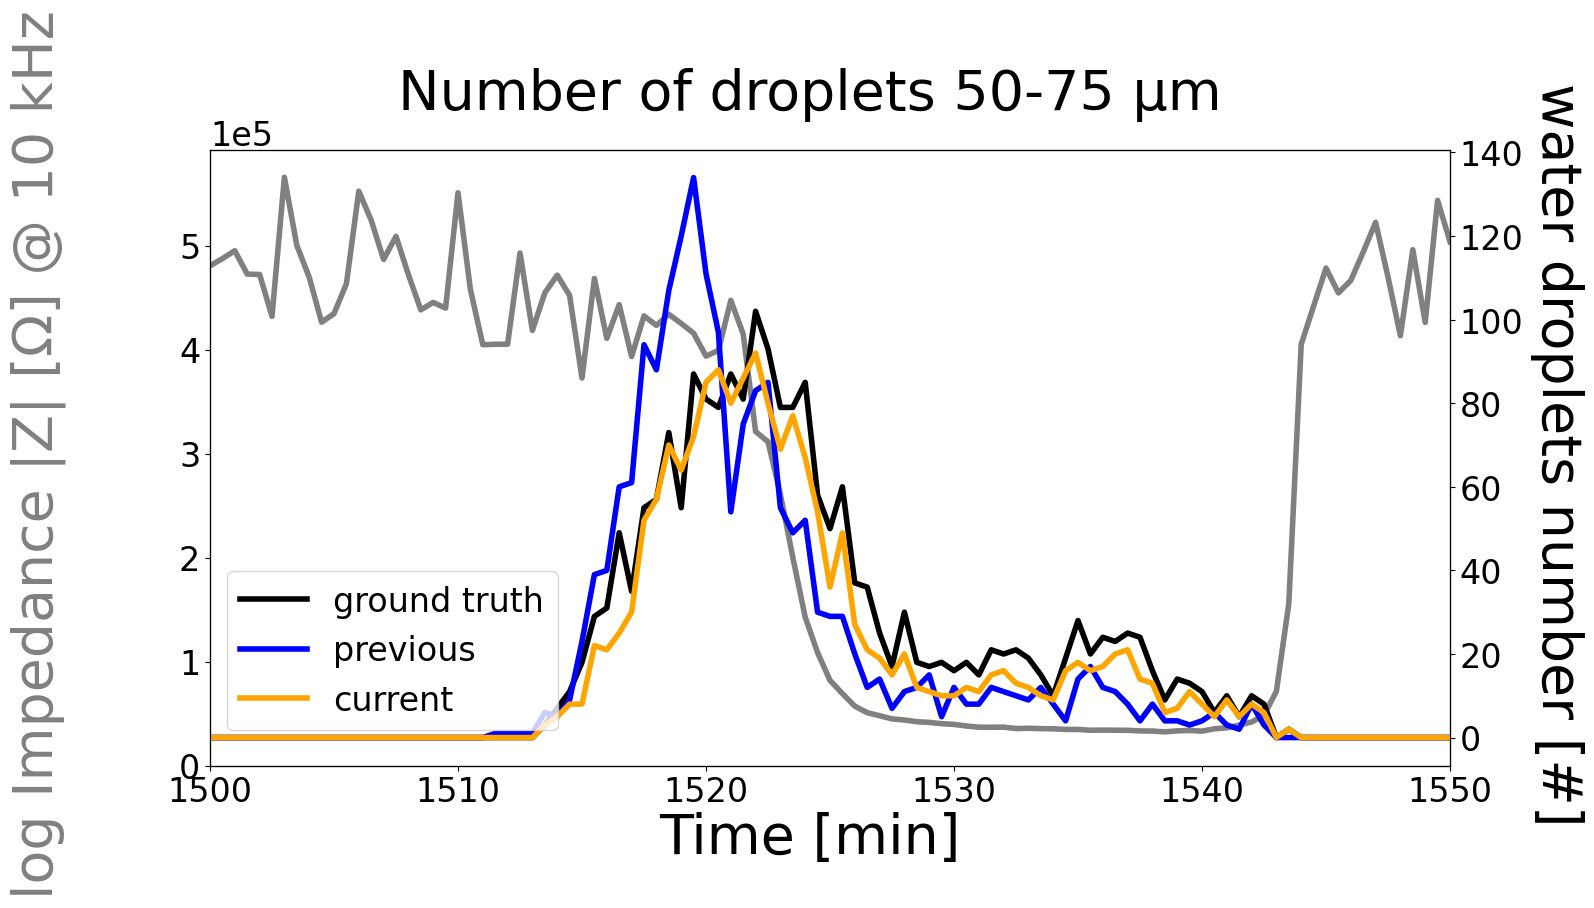

In [45]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Number of droplets 50-75 µm [#]"
title = "Number of droplets 50-75 µm"
lw = 4
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
ax.set_xlabel(None)

fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets number [#]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)
# plt.show()


Text(0.5, 0.93, 'Number of droplets 75-100 µm')

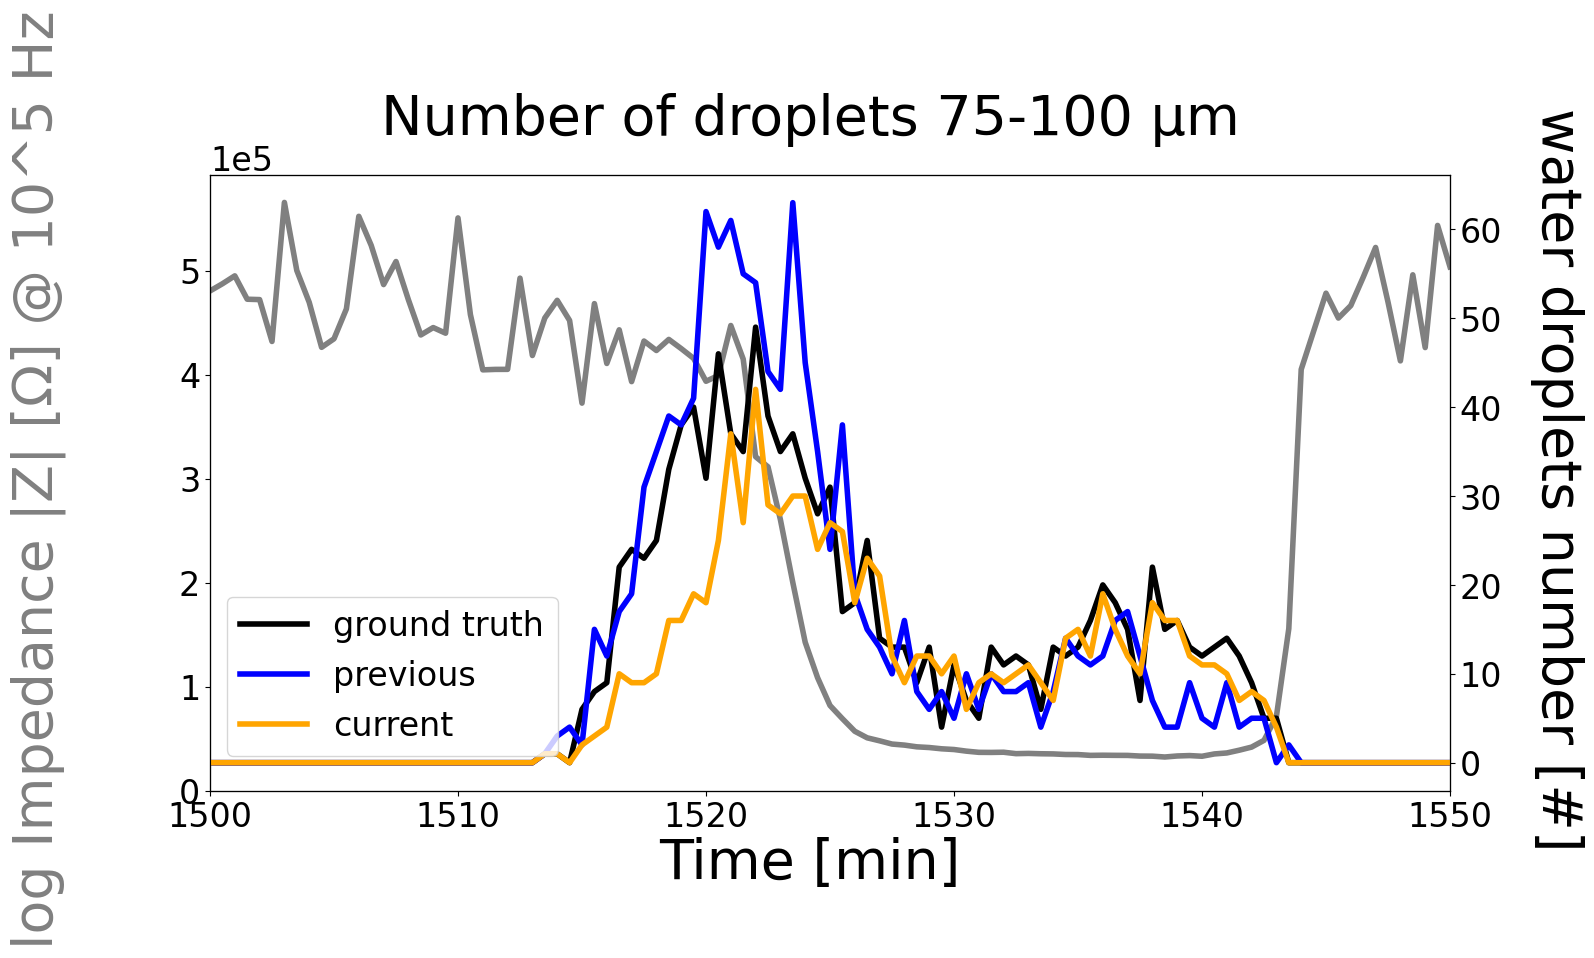

In [48]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Number of droplets 75-100 µm [#]"
title = "Number of droplets 75-100 µm"
lw = 4
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)

fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10^5 Hz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets number [#]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)
# plt.show()


Text(0.5, 0.93, 'Number of droplets >100 µm')

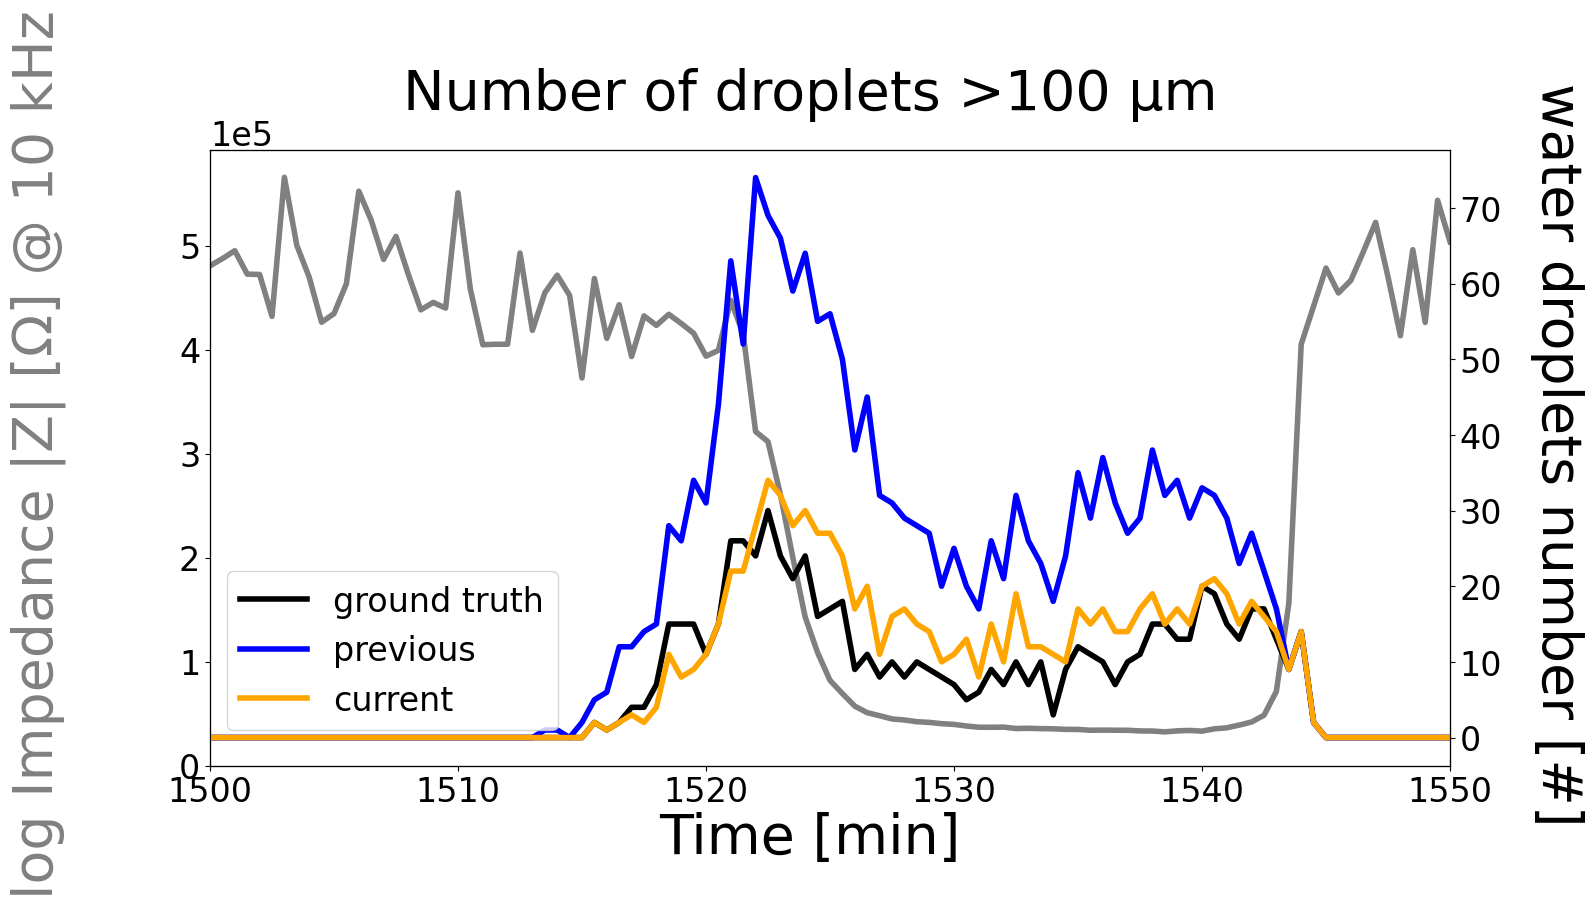

In [49]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Number of droplets >100 µm [#]"
title = "Number of droplets >100 µm"
lw = 4
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 

line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets number [#]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)
# plt.show()


Text(0.5, 0.93, 'Number of closed water film')

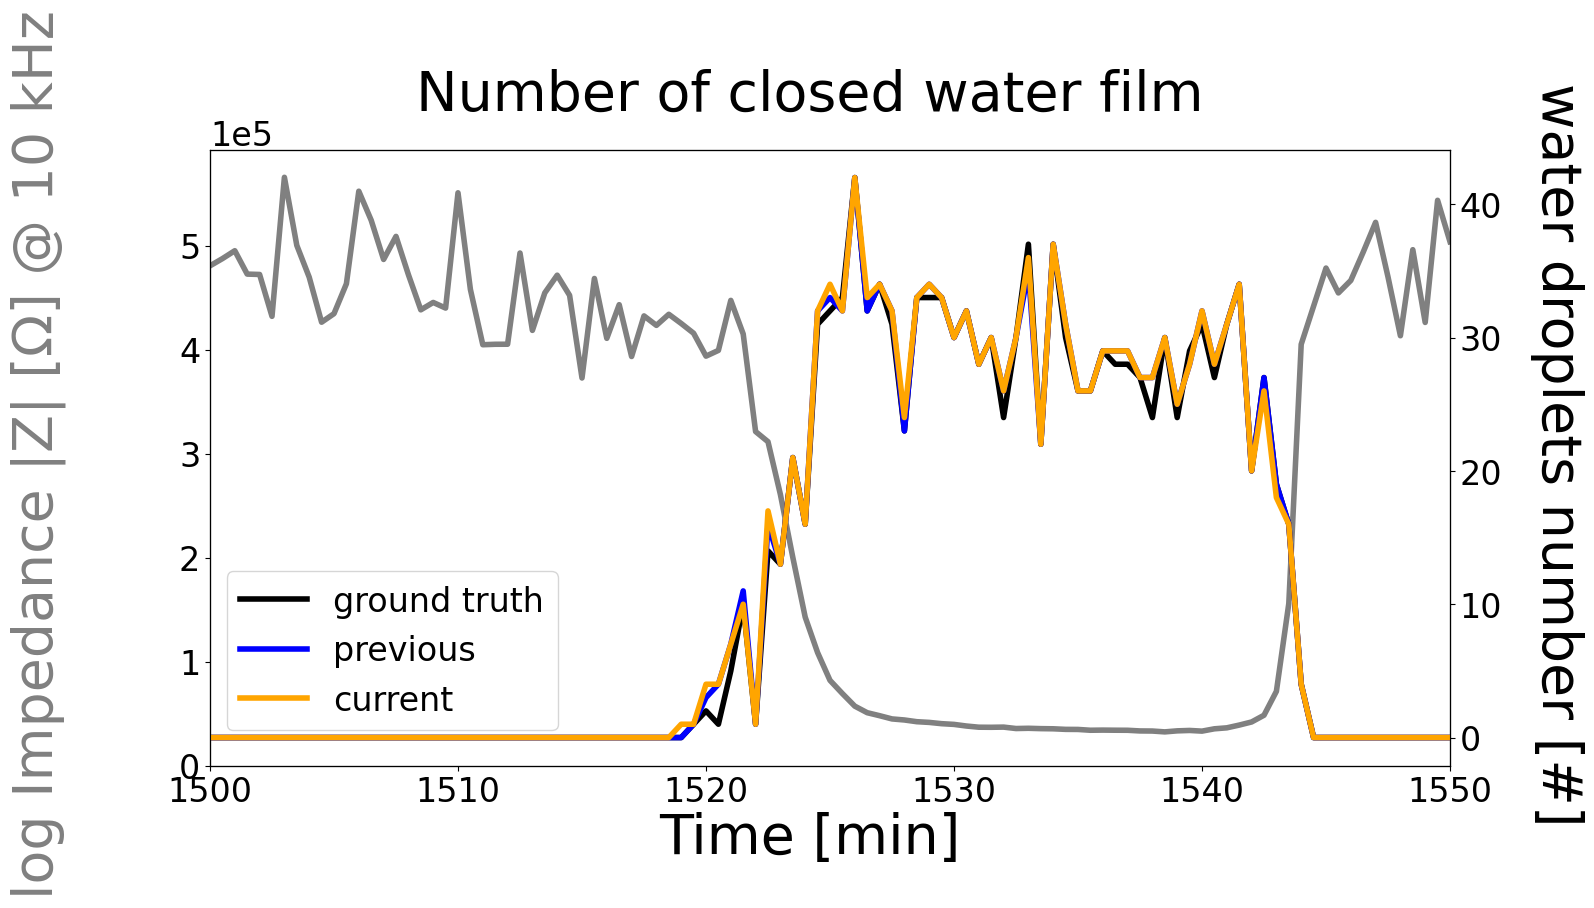

In [50]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Number of closed water film [#]"
title = "Number of closed water film"
lw = 4
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 

line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))
ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets number [#]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)
# plt.show()


Text(0.5, 0.93, 'Total Number of droplets')

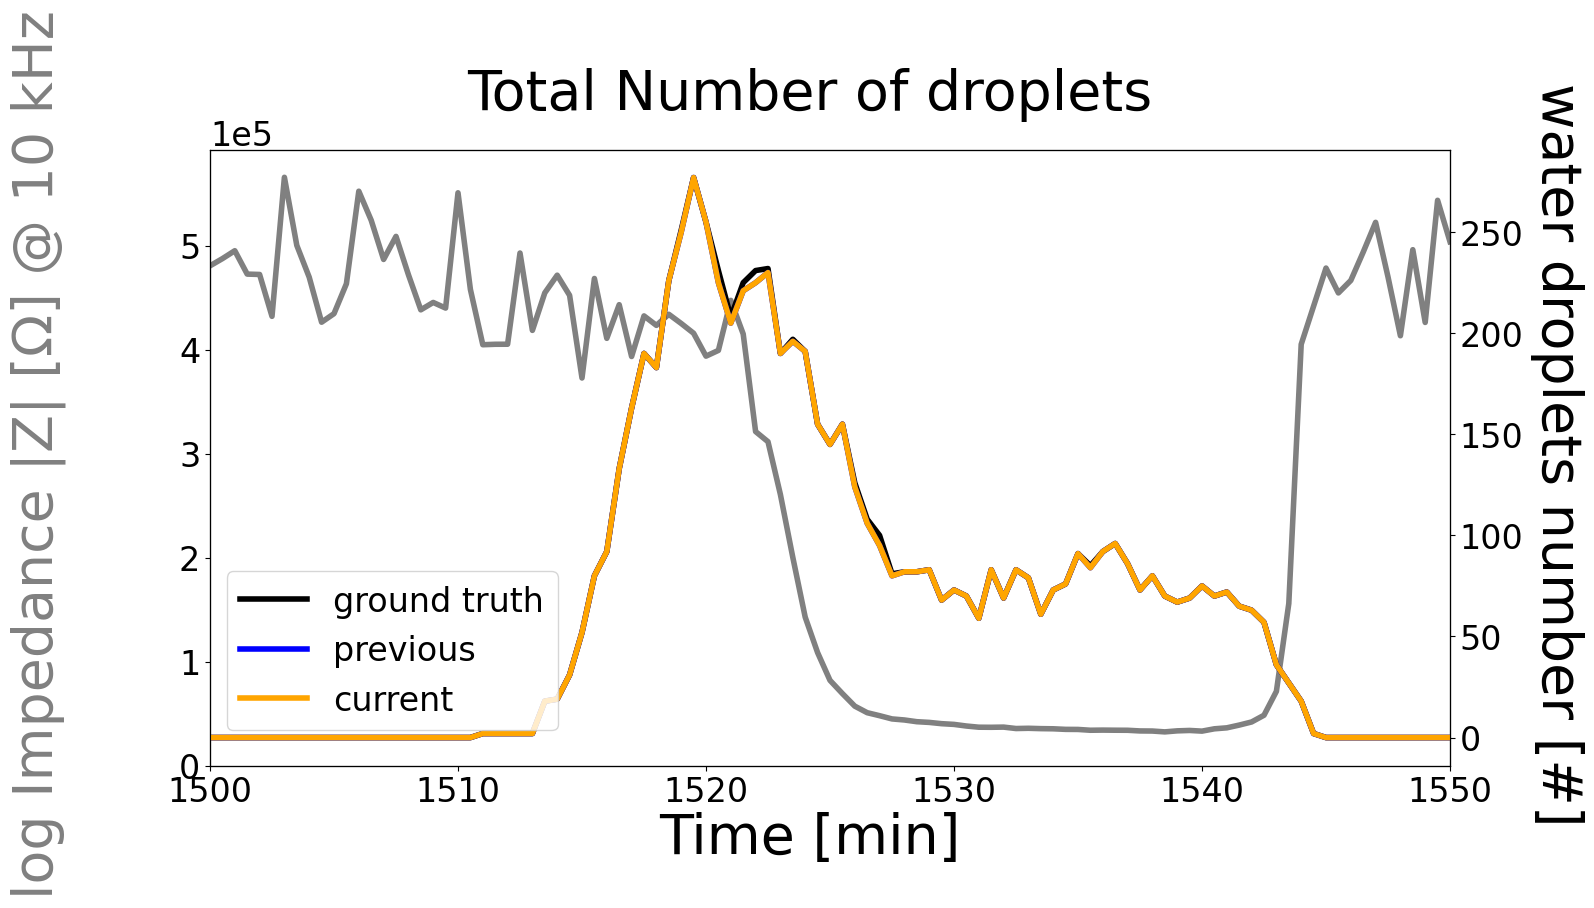

In [51]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
lw = 4
y_name = "Total Number of droplets Ntotal [#]"
title = "Total Number of droplets"
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)

fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'water droplets number [#]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)

# plt.show()


Text(0.5, 0.93, 'Accumulated area of droplets <50 µm')

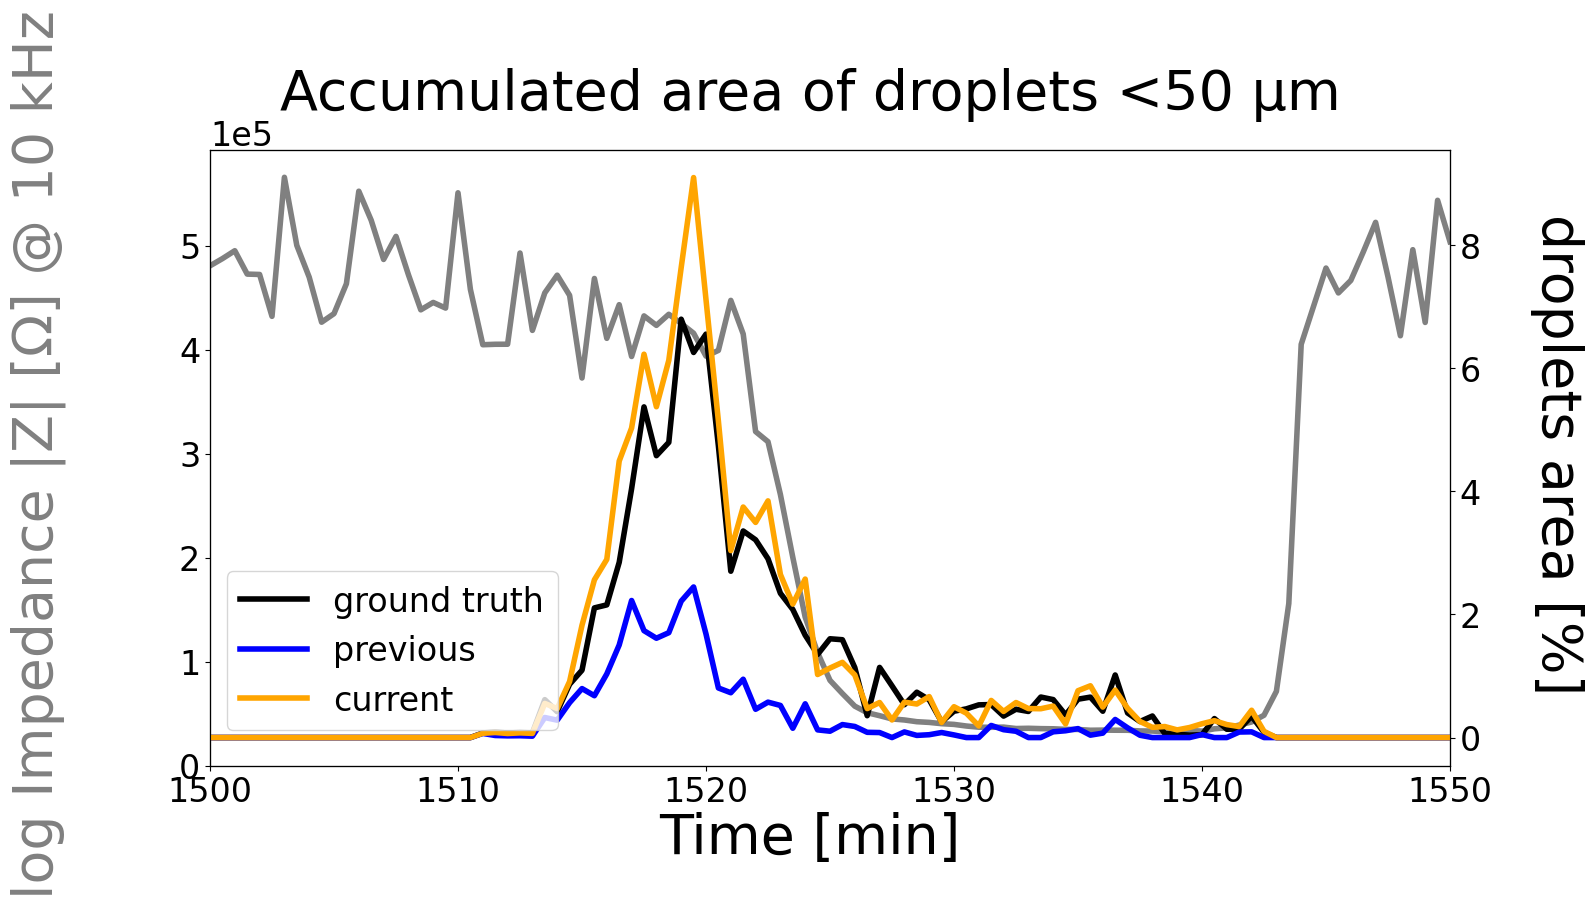

In [52]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Cumulated area droplets <50 µm [%]"
y_color = "green"
title = "Accumulated area of droplets <50 µm"
lw = 4
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'droplets area [%]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)
# plt.show()


Text(0.5, 0.93, 'Accumulated area of droplets 50-75 µm ')

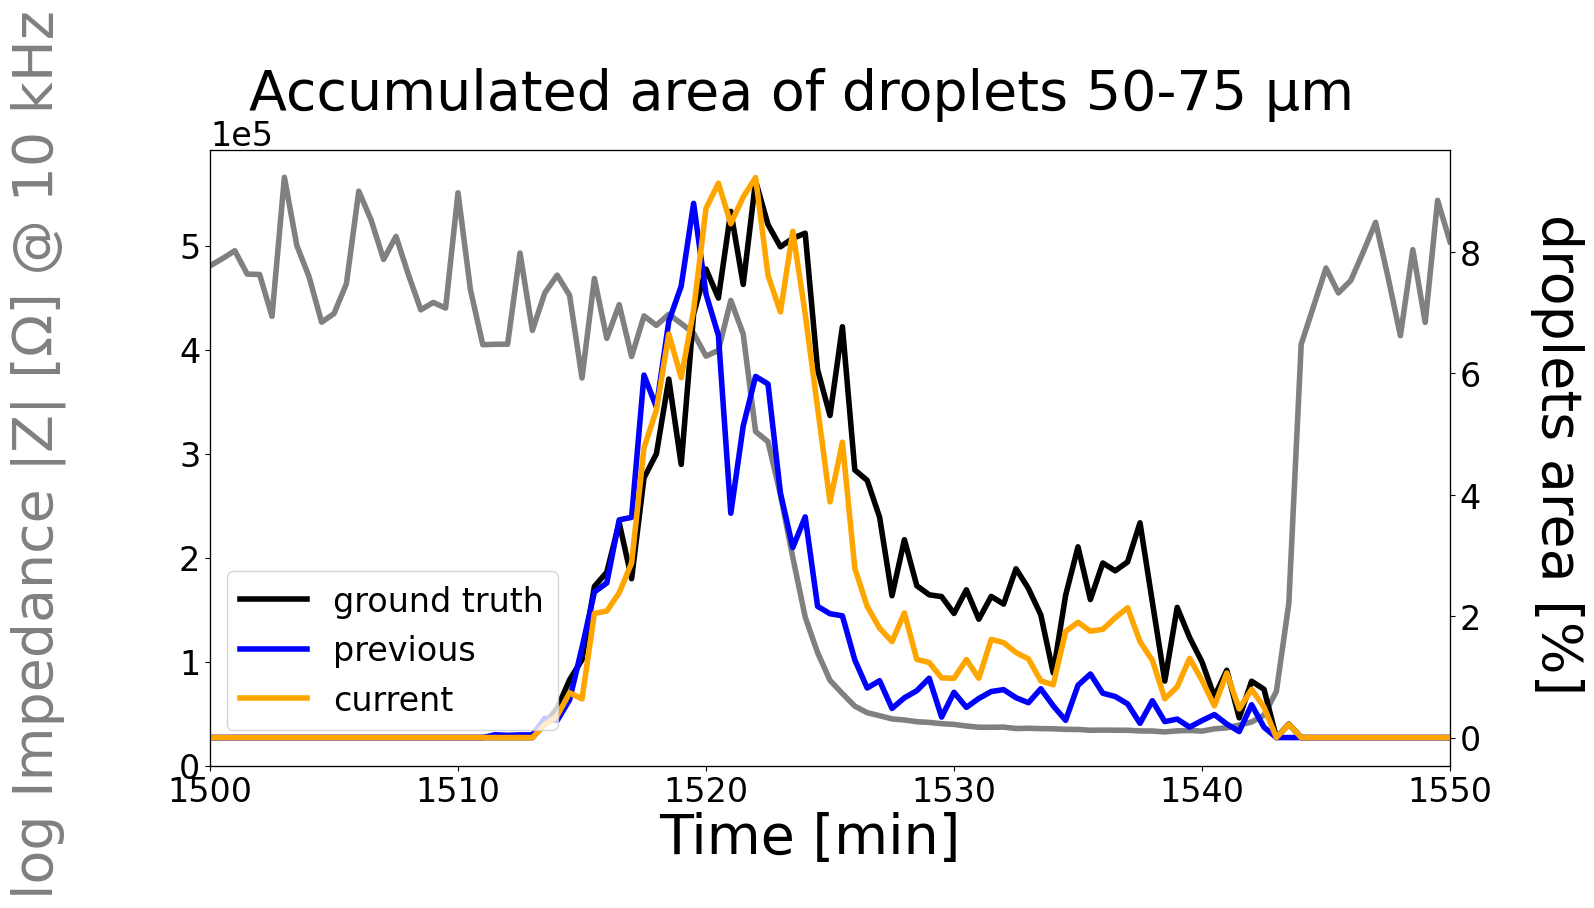

In [53]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Cumulated area droplets 50-75 µm [%]"
y_color = "gold"
title = "Accumulated area of droplets 50-75 µm"
lw = 4
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'droplets area [%]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title} ", ha='center', fontsize=40)
# plt.show()


Text(0.5, 0.93, 'Accumulated area of droplets 75-100 µm')

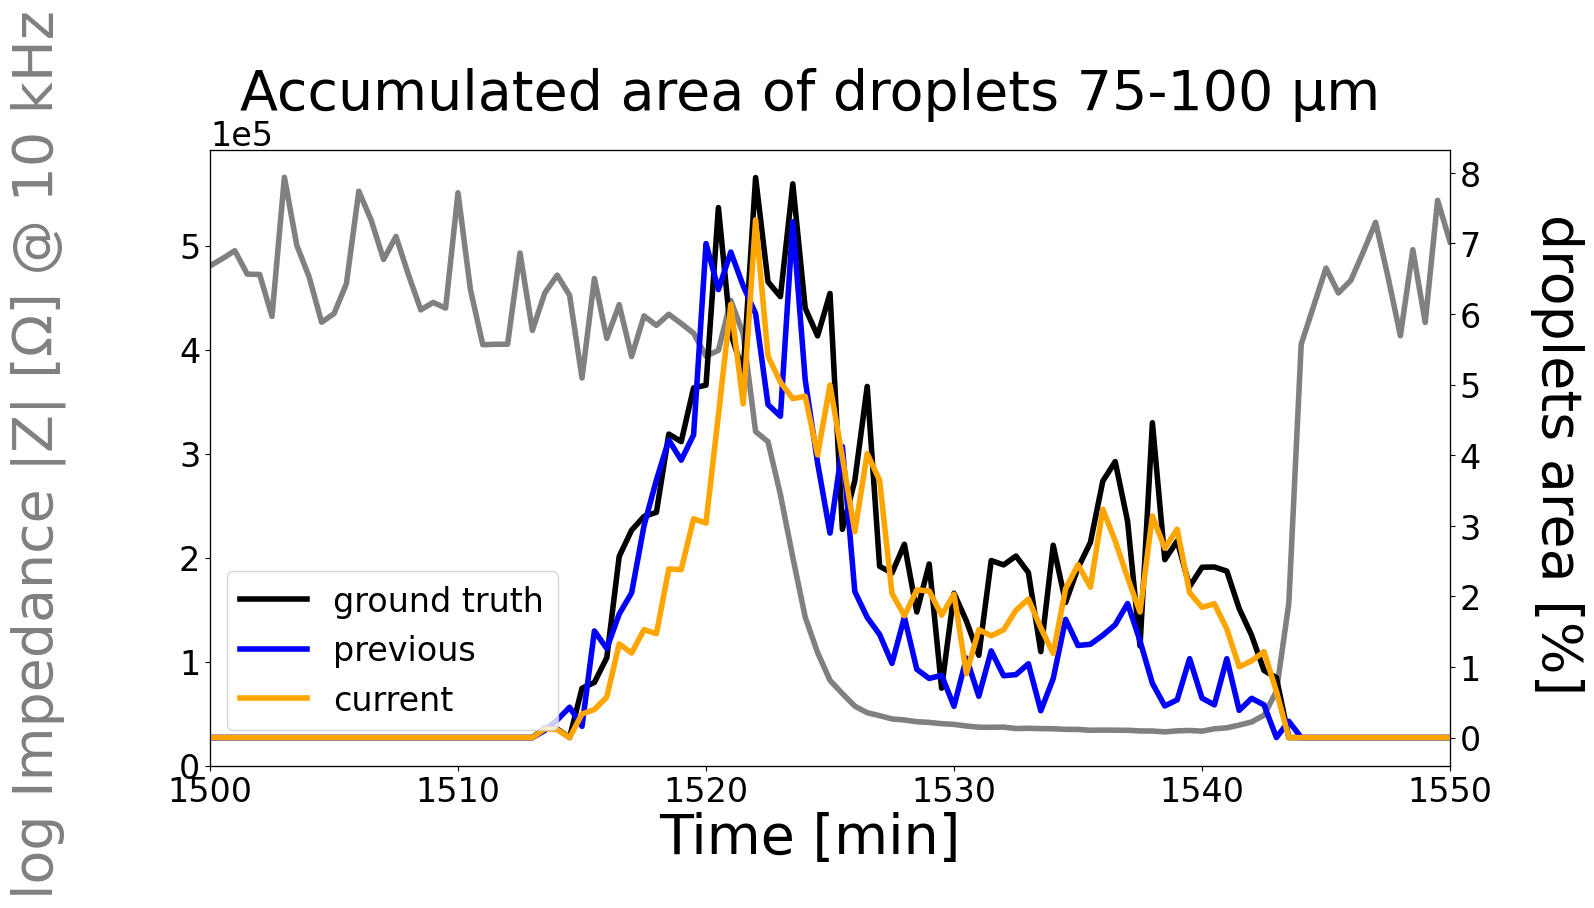

In [54]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Cumulated area droplets 75-100 µm [%]"
title = "Accumulated area of droplets 75-100 µm"
lw = 4
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'droplets area [%]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)
# plt.show()


Text(0.5, 0.93, 'Accumulated area of droplets >100 µm')

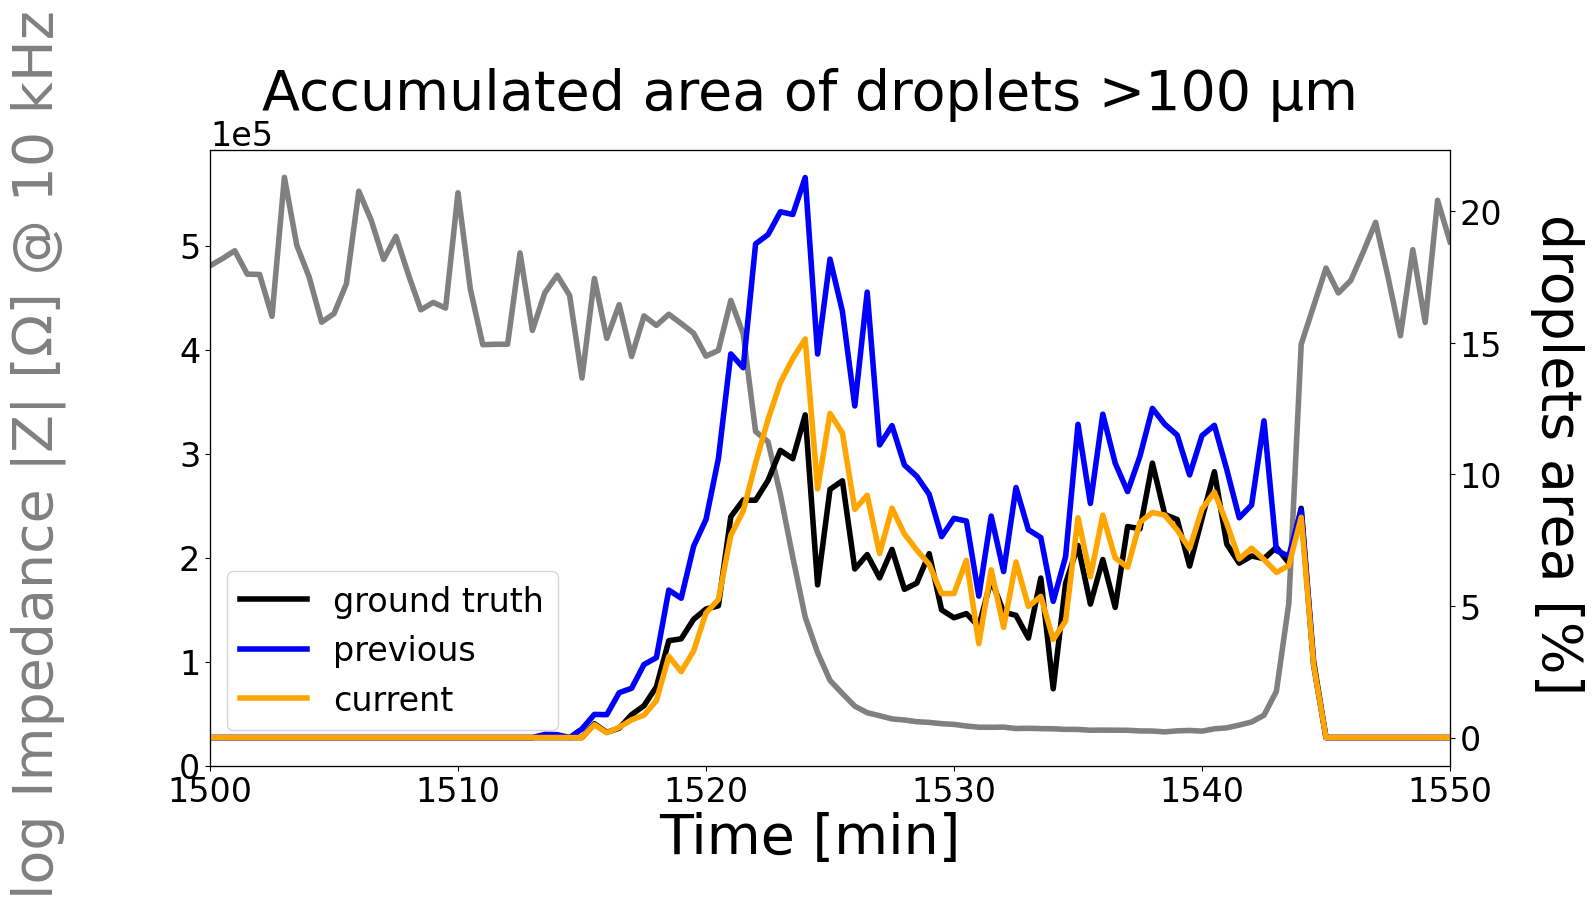

In [55]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Cumulated area droplets >100 µm [%]"
y_color = "blue"
title = "Accumulated area of droplets >100 µm"
lw = 4
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
handles, labels = ax.get_legend_handles_labels()
line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'droplets area [%]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)
# plt.show()


Text(0.5, 0.93, 'Accumulated area of closed water film')

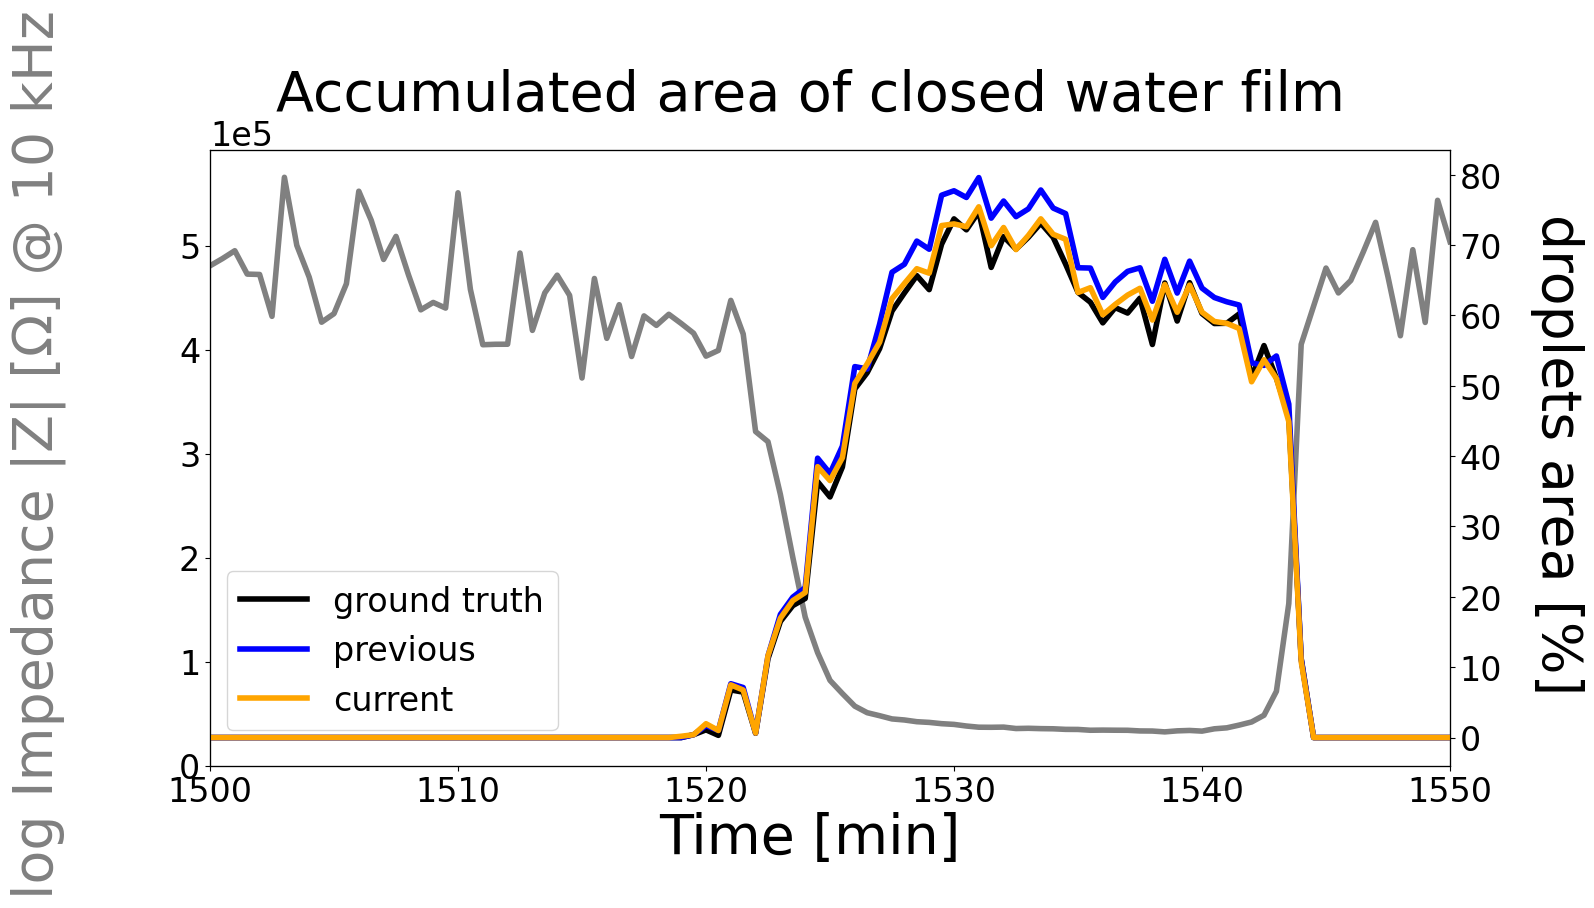

In [56]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Area of closed water film [%]"
y_color = "red"
title = "Accumulated area of closed water film"
lw = 4
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'droplets area [%]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)
# plt.show()


Text(0.5, 0.93, 'Accumulated area of total droplets')

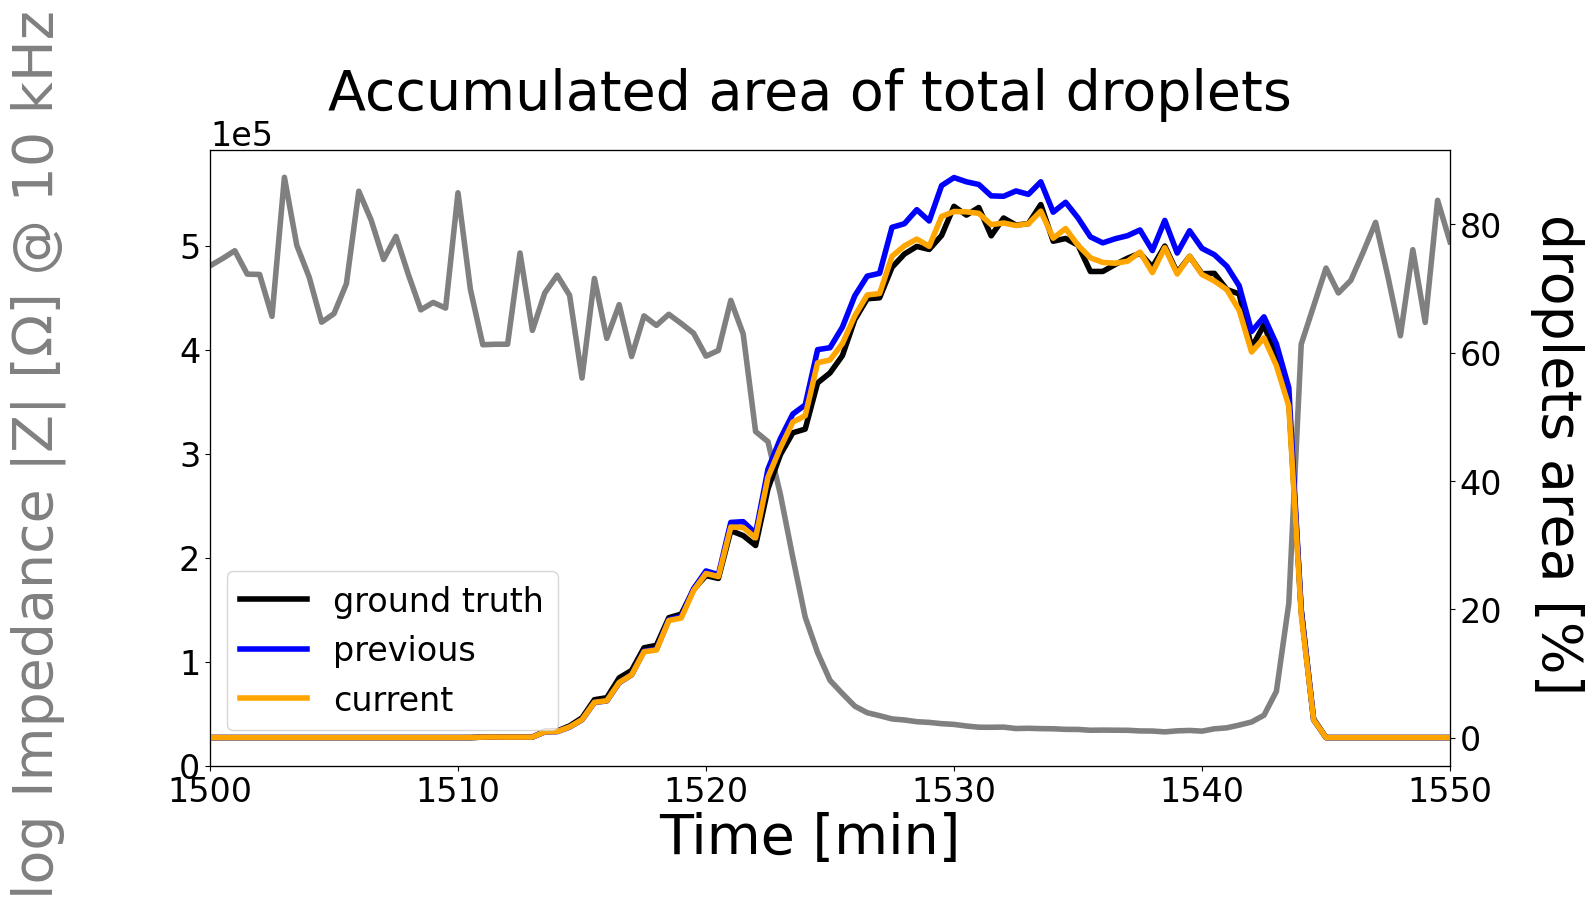

In [57]:
import matplotlib.pyplot as plt
dfs = (df2, df3)
y_name = "Covered water area [%]"
y_color = "black"
lw = 4
title = "Accumulated area of total droplets"
text_kwargs = dict(ha='center', va='top', fontsize=24, color='black')
fig, ax = plt.subplots(1, sharex="all", figsize=(16, 8))
ax_cp = ax.twinx()
df1.plot(x="Time [m]", y="Impedance |Z| [Ohm]", secondary_y=False, color="gray", ax=ax, linewidth=lw, legend=False)
ax.title.set_size(20)
line_second = df1.plot(x="Time [m]", y=y_name, secondary_y=True, color="black", ax=ax_cp, legend=False, linewidth=lw)
line_second = df2.plot(x="Time [m]", y=y_name, secondary_y=True, color="blue", ax=ax_cp, legend=False, linewidth=lw)
line_second = df3.plot(x="Time [m]", y=y_name, secondary_y=True, color="orange", ax=ax_cp, legend=False, linewidth=lw)


# h, l = line_second.axes.get_legend_handles_labels()
import matplotlib.lines as mlines
gt_label = mlines.Line2D([], [], color='black', label='ground truth', linewidth=lw)
previous_label = mlines.Line2D([], [], color='blue', label='previous', linewidth=lw)
current_label = mlines.Line2D([], [], color='orange', label='current', linewidth=lw)

h = [gt_label, previous_label, current_label]
l = [hs.get_label() for hs in h] 
line_second.axes.legend(h, l, loc="lower left", frameon=True, bbox_to_anchor=(0,0.03))
ax.ticklabel_format(axis="y",style="sci", scilimits=(0,0))

ax.set_xlabel(None)
ax.set_xlim(df["Time [m]"].min(), df["Time [m]"].max())
ax.set_ylim(0)

ax.set_xlabel(None)
fig.text(0, 0.5, 'log Impedance |Z| [Ω] @ 10 kHz', va='center', rotation='vertical',  fontsize=40, color="gray")
fig.text(0.5, 0, 'Time [min]', ha='center', fontsize=40)
fig.text(0.95, 0.5, 'droplets area [%]', va='center', rotation=-90,  fontsize=40)
fig.text(0.5, 0.93, f"{title}", ha='center', fontsize=40)
# plt.show()
